In [1]:
pip install pysr


  Using cached pysr-0.19.4-py3-none-any.whl.metadata (53 kB)
  Using cached juliacall-0.9.23-py3-none-any.whl.metadata (4.6 kB)
  Using cached click-8.1.7-py3-none-any.whl.metadata (3.0 kB)
  Using cached juliapkg-0.1.14-py3-none-any.whl.metadata (6.1 kB)
  Using cached semver-3.0.2-py3-none-any.whl.metadata (5.0 kB)
Using cached pysr-0.19.4-py3-none-any.whl (80 kB)
Using cached juliacall-0.9.23-py3-none-any.whl (12 kB)
Using cached click-8.1.7-py3-none-any.whl (97 kB)
   ---------------------------------------- 0.0/6.2 MB ? eta -:--:--
    --------------------------------------- 0.1/6.2 MB 2.2 MB/s eta 0:00:03
   -- ------------------------------------- 0.4/6.2 MB 4.6 MB/s eta 0:00:02
   ---- ----------------------------------- 0.7/6.2 MB 5.2 MB/s eta 0:00:02
   ----- ---------------------------------- 0.9/6.2 MB 5.4 MB/s eta 0:00:01
   ---------- ----------------------------- 1.6/6.2 MB 7.4 MB/s eta 0:00:01
   ------------- -------------------------- 2.1/6.2 MB 7.9 MB/s eta 0:00:01
 

In [ ]:
import numpy as np
from pysr import pysr, best 

In [5]:
#Datasets

X = 2 * np.random.randn(1000, 3)
y1 = 3 * np.cos(X[:, 2]) * X[:, 1] ** 3 - 1

In [7]:
X

array([[-1.07683946,  0.62703193,  1.57631046],
       [-3.0089544 , -3.49118957,  1.15291153],
       [ 3.48826253,  1.66116331,  1.21253572],
       ...,
       [-4.54892279,  3.13579416, -1.41447457],
       [-3.10543776,  0.83264333,  6.1505845 ],
       [-1.71864649, -0.06536772,  0.49081556]])

In [10]:
y1

array([ 1.37064109e+02, -2.81054729e+00, -1.00395101e+00,  2.32778970e+00,
       -1.16975679e+00,  3.40843435e+01,  4.16046905e+00, -7.56014756e+01,
        2.03490328e+02,  4.12219492e-01,  2.95671449e+00, -1.27245158e+00,
       -9.25235306e-01, -1.57692566e+00, -1.31889531e+01,  8.75629355e+01,
       -3.87222338e-01,  4.70666981e+01, -2.21940451e+02,  2.26160992e+01,
        7.80497149e-01, -3.91418932e-02,  1.62528062e+01, -3.19968154e+00,
        1.23087080e+02, -1.80404738e+00,  4.24983449e+00, -6.05574380e+01,
        6.39562055e+00, -6.54968230e-01, -5.45212482e+00,  2.79162019e+01,
        1.40166760e+02, -1.49651863e+02, -3.70956884e+00, -1.00013157e+00,
       -1.24711849e+01,  1.45795673e+00,  2.07777245e+01,  5.16100235e+01,
       -2.64828544e+01, -2.54278091e+01, -1.67092304e+00,  2.83451334e+00,
        1.29269932e+00, -9.74586010e+00, -6.42126813e+00, -4.42153608e+00,
       -1.07677438e+02, -1.13994301e+01, -4.45894498e+00,  1.47556482e+00,
        3.84752334e+00, -

In [ ]:
model.set_params(extra_sympy_mappings={'inv': lambda x: 1/x}), 
where 
lambda x: 1/x

In [9]:
#Learn Equation

equations = pysr(
    X,
    y1,
    niterations=5,
    binary_operators=["+", "*"],
    unary_operators=[
        "cos",
        "exp",
        "sin",  # predefined library operators
        #"inv(X) = 1/X", # define your operators, Julia syntax
    ],
)

c:\Users\chidi\anaconda3\envs\boot_DA\lib\site-packages\pysr\deprecated.py:30: FutureWarning: Calling `pysr` is deprecated. Please use `model = PySRRegressor(**params); model.fit(X, y)` going forward.
  warnings.warn(
c:\Users\chidi\anaconda3\envs\boot_DA\lib\site-packages\pysr\sr.py:2582: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


Compiling Julia backend...


[ Info: Started!


Running the procedure as a model

In [10]:
from pysr import PySRRegressor
import numpy as np

# Define your data (example X and y)
X = np.random.rand(100, 2)  # Example feature data
y1 = np.random.rand(100)  # Example target data

# Initialize the symbolic regression model
model = PySRRegressor(
    niterations=5,
    binary_operators=["+", "*"],
    unary_operators=[
        "cos",
        "exp",
        "sin",  # predefined library operators
        "inv(X) = 1/X",  # define your custom operator in Julia syntax
    ],
    extra_sympy_mappings={"inv": lambda x: 1/x},  # Define custom operator in SymPy
)

# Fit the model to data
model.fit(X, y1)


c:\Users\chidi\anaconda3\envs\boot_DA\lib\site-packages\pysr\sr.py:2582: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(
[ Info: Started!


PySRRegressor.equations_ = [
	   pick     score                                           equation  \
	0        0.000000                                    sin(0.47104168)   
	1        0.008576                    (-0.15230706 * x0) + 0.53553456   
	2        0.003418                     sin(exp(sin(x0 + -2.7078695)))   
	3        0.001855          (sin(inv(x0)) * -0.15230706) + 0.53553456   
	4        0.009125           sin(exp(sin(sin(inv(x0 + -1.4309057)))))   
	5        0.008635      sin(exp(sin(cos(-3.5477908 + sin(inv(x0))))))   
	6  >>>>  0.013184  1.1370611 * inv(exp(sin(cos(sin(exp(exp(x1))))...   
	7        0.000138  ((1.0753624 + 0.025684036) * 1.0465528) * inv(...   
	
	       loss  complexity  
	0  0.073766           2  
	1  0.071892           5  
	2  0.071647           6  
	3  0.071514           7  
	4  0.070865           8  
	5  0.070255           9  
	6  0.067531          12  
	7  0.067494          16  
]

In [18]:
#Datasets

X1 = 2 * np.random.randn(1000, 4)
y1 = 2 * np.cos(X[:, 1]) * X[:, 1] ** 5 - 1

In [17]:

# Initialize the symbolic regression model
model = PySRRegressor(
    niterations=5,
    binary_operators=["+", "*"],
    unary_operators=[
        "cos",
        "exp",
        "sin",  # predefined library operators
        "inv(X) = 1/X",  # define your custom operator in Julia syntax
    ],
    extra_sympy_mappings={"inv": lambda x: 1/x},  # Define custom operator in SymPy
)

# Fit the model to data
model.fit(X1, y1)

c:\Users\chidi\anaconda3\envs\boot_DA\lib\site-packages\pysr\sr.py:2582: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


ValueError: Found input variables with inconsistent numbers of samples: [1000, 100]

In [19]:
print(f"X1 shape: {X1.shape}")
print(f"y1 shape: {y1.shape}")


X1 shape: (1000, 4)
y1 shape: (100,)


In [20]:
# Check and match lengths
if X1.shape[0] != len(y1):
    print(f"Inconsistent lengths: X1 has {X1.shape[0]} samples, y1 has {len(y1)} samples.")
    # Truncate X1 to match y1 length
    X1 = X1[:len(y1)]

# After ensuring the lengths are consistent, fit the model
model = PySRRegressor(
    niterations=5,
    binary_operators=["+", "*"],
    unary_operators=["cos", "exp", "sin"],
    extra_sympy_mappings={"inv": lambda x: 1/x}  # Define custom operator in SymPy
)

# Fit the model
model.fit(X1, y1)

Inconsistent lengths: X1 has 1000 samples, y1 has 100 samples.


c:\Users\chidi\anaconda3\envs\boot_DA\lib\site-packages\pysr\sr.py:2582: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(
[ Info: Started!


PySRRegressor.equations_ = [
	   pick     score                                           equation  \
	0        0.000000                                   sin(-0.89879745)   
	1        0.004116           cos(cos(-0.100175224 * x1)) + -1.3531282   
	2        0.002146           sin(cos(exp(cos(sin(0.08405628) * x1))))   
	3        0.004347  sin(cos(exp(cos((-1.104515 * x1) * 0.08405628))))   
	4  >>>>  0.060398  sin(sin(sin(exp(sin(0.6383955) * x2)) + -1.849...   
	5        0.020139  sin(sin((sin(exp(0.60146517 * x2)) * 0.8804185...   
	6        0.020679  sin(sin(sin(exp(sin(x3) + (x0 * 0.44660622)) *...   
	
	       loss  complexity  
	0  0.084235           2  
	1  0.082519           7  
	2  0.082342           8  
	3  0.081985           9  
	4  0.077180          10  
	5  0.075641          11  
	6  0.071091          14  
]

INCREASE THE AMOUNT OF POSSIBLE OPERATORS TO TRY

In [49]:
# Check and match lengths
if X1.shape[0] != len(y1):
    print(f"Inconsistent lengths: X1 has {X1.shape[0]} samples, y1 has {len(y1)} samples.")
    # Truncate X1 to match y1 length
    X1 = X1[:len(y1)]

# After ensuring the lengths are consistent, fit the model
model = PySRRegressor(
    niterations=5,
    binary_operators=["+", "*", "-", "/"],
    unary_operators=["cos", "exp", "sin"],
    extra_sympy_mappings={"inv": lambda x: 1/x}  # Define custom operator in SymPy
)

# Fit the model
model.fit(X1, y1)

c:\Users\chidi\anaconda3\envs\boot_DA\lib\site-packages\pysr\sr.py:2582: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(
[ Info: Started!


PySRRegressor.equations_ = [
	   pick     score                                           equation  \
	0        0.000000                                    sin(-0.8986875)   
	1        0.004699            sin(sin((0.08481119 * x2) + -1.092582))   
	2        0.019799     sin(sin((sin(-0.081179745) * x3) - 1.1645108))   
	3        0.001262  (-0.33754328 / 0.43138176) + (exp(x1 - -1.2058...   
	4  >>>>  0.053253  sin(sin(-1.1164784 - sin(2.312907 * (0.0976314...   
	5        0.002117  sin((-0.18960968 - exp(-0.39086)) - (-0.018221...   
	6        0.001959  sin((-0.18960968 - exp(sin(-0.39086))) - (-0.0...   
	7        0.002141  sin((-0.18960968 - exp(-0.39086)) - (-0.018221...   
	8        0.011267  sin(sin((-0.18960968 - cos(0.20512864)) - (-0....   
	9        0.017051  sin(sin((-0.18960968 - cos(0.44704962)) - sin(...   
	
	       loss  complexity  
	0  0.084235           2  
	1  0.082279           7  
	2  0.080666           8  
	3  0.080462          10  
	4  0.076289          11  
	5  0.075646          15  
	6  0.075498          16  
	7  0.075336          17  
	8  0.074492          18  
	9  0.073233          19  
]

In [54]:
# Check and match lengths
if X1.shape[0] != len(y1):
    print(f"Inconsistent lengths: X1 has {X1.shape[0]} samples, y1 has {len(y1)} samples.")
    # Truncate X1 to match y1 length
    X1 = X1[:len(y1)]

# After ensuring the lengths are consistent, fit the model
model = PySRRegressor(
    niterations=5,
    binary_operators=["+", "*", "-", "/"],
    unary_operators=["cos", "exp", "sin"],
    extra_sympy_mappings={"inv": lambda x: 1/x}  # Define custom operator in SymPy
)

# Fit the model
model.fit(X1, y1)

c:\Users\chidi\anaconda3\envs\boot_DA\lib\site-packages\pysr\sr.py:2582: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(
[ Info: Started!


PySRRegressor.equations_ = [
	   pick     score                                           equation  \
	0        0.000000                                   sin(-0.89879745)   
	1        0.007092                 0.18684794 - cos(-0.12388619 * x1)   
	2        0.004104             sin(0.0477323 - cos(x1 * -0.15147923))   
	3        0.003252            sin(-1.705573 + cos(cos(exp(x0 - x3))))   
	4        0.024125       sin(sin(-1.705573 + cos(cos(exp(x0 - x3)))))   
	5        0.050154  0.20162281 - cos(sin(sin(-0.08126309 * (0.4993...   
	6        0.002833  (-0.62013865 * (0.22256975 * (((cos(x0 + x3) *...   
	7  >>>>  0.061863  (-0.62013865 * ((((cos(x0 + x3) * -0.62013865)...   
	8        0.000288  (-0.62013865 * sin((((cos(x0 + x3) * -0.620138...   
	
	       loss  complexity  
	0  0.084235           2  
	1  0.081879           6  
	2  0.081543           7  
	3  0.081015           9  
	4  0.079084          10  
	5  0.075215          11  
	6  0.074157          16  
	7  0.069709          17  
	8  0.069688          18  
]

In [55]:
# Display the discovered equations

model.equations_

complexity      loss     score  \
0           2  0.084235  0.000000   
1           6  0.081879  0.007092   
2           7  0.081543  0.004104   
3           9  0.081015  0.003252   
4          10  0.079084  0.024125   
5          11  0.075215  0.050154   
6          16  0.074157  0.002833   
7          17  0.069709  0.061863   
8          18  0.069688  0.000288   

                                            equation  \
0                                   sin(-0.89879745)   
1                 0.18684794 - cos(-0.12388619 * x1)   
2             sin(0.0477323 - cos(x1 * -0.15147923))   
3            sin(-1.705573 + cos(cos(exp(x0 - x3))))   
4       sin(sin(-1.705573 + cos(cos(exp(x0 - x3)))))   
5  0.20162281 - cos(sin(sin(-0.08126309 * (0.4993...   
6  (-0.62013865 * (0.22256975 * (((cos(x0 + x3) *...   
7  (-0.62013865 * ((((cos(x0 + x3) * -0.62013865)...   
8  (-0.62013865 * sin((((cos(x0 + x3) * -0.620138...   

                                        sympy_format  \
0                                   sin(-0.89879745)   
1                   0.18684794 - cos(-0.12388619*x1)   
2             sin(0.0477323 - cos(x1*(-0.15147923)))   
3             sin(cos(cos(exp(x0 - x3))) - 1.705573)   
4        sin(sin(cos(cos(exp(x0 - x3))) - 1.705573))   
5  0.20162281 - cos(sin(sin(-0.08126309*(0.499324...   
6  -0.62013865*0.22256975*(cos(x0 + x3)*(-0.62013...   
7  -0.62013865*(cos(x0 + x3)*(-0.62013865) - 1*0....   
8  -0.62013865*sin((cos(x0 + x3)*(-0.62013865) - ...   

                                       lambda_format  
0                  PySRFunction(X=>sin(-0.89879745))  
1  PySRFunction(X=>0.18684794 - cos(-0.12388619*x1))  
2  PySRFunction(X=>sin(0.0477323 - cos(x1*(-0.151...  
3  PySRFunction(X=>sin(cos(cos(exp(x0 - x3))) - 1...  
4  PySRFunction(X=>sin(sin(cos(cos(exp(x0 - x3)))...  
5  PySRFunction(X=>0.20162281 - cos(sin(sin(-0.08...  
6  PySRFunction(X=>-0.62013865*0.22256975*(cos(x0...  
7  PySRFunction(X=>-0.62013865*(cos(x0 + x3)*(-0....  
8  PySRFunction(X=>-0.62013865*sin((cos(x0 + x3)*...

In [56]:
# Get the best equation (with the lowest loss)
best_equation = model.get_best()
print("Best equation:", best_equation)


Best equation: complexity                                                      17
loss                                                      0.069709
score                                                     0.061863
equation         (-0.62013865 * ((((cos(x0 + x3) * -0.62013865)...
sympy_format     -0.62013865*(cos(x0 + x3)*(-0.62013865) - 1*0....
lambda_format    PySRFunction(X=>-0.62013865*(cos(x0 + x3)*(-0....
Name: 7, dtype: object


In [57]:
# Make predictions on new data X_new
y_pred1 = model.predict(X1)


In [48]:
y_pred1

array([-0.77220199, -0.84894866, -0.76427357, -0.83112962, -0.76754286,
       -0.74751866, -0.77373437, -0.63136906, -0.76527434, -0.87025672,
       -0.7597811 , -0.74748026, -0.90073471, -0.7464434 , -0.74701929,
       -0.6983162 , -0.75594869, -0.76108169, -0.74680738, -0.82011551,
       -0.75033344, -0.8582596 , -0.66844001, -0.8663112 , -0.77399174,
       -0.75585311, -0.77091327, -0.76600247, -0.79896577, -0.81112678,
       -0.79072357, -0.81352281, -0.75315521, -0.79025907, -0.78136262,
       -0.8046283 , -0.74213025, -0.76153815, -0.77477321, -0.7877557 ,
       -0.74719395, -0.89082068, -0.8119692 , -0.75497955, -0.88875713,
       -0.72352052, -0.78378996, -0.75314349, -0.77304446, -0.61266581,
       -0.77548591, -0.6696251 , -0.81206695, -0.8308194 , -0.71911871,
       -0.83875657, -0.74854202, -0.80389542, -0.81890471, -0.78014872,
       -0.78634476, -0.79224453, -0.74269816, -0.64956094, -0.72774579,
       -0.78993968, -0.7313974 , -0.78593094, -0.902061  , -0.80

In [60]:
# Compare predictions with actual values
print("Ground Truth Y values:", y1)

# Calculate evaluation metrics
mae = mean_absolute_error(y1, y_pred1)
mse = mean_squared_error(y1, y_pred1)
rmse = np.sqrt(mse)
r2 = r2_score(y1, y_pred1)

# Print the comparison metrics
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R-squared (R²): {r2}')

Ground Truth Y values: [-0.99985162 -1.         -0.64879804 -0.68483367 -0.98151934 -0.99903906
 -0.99999851 -0.96756966 -0.47917019 -0.79624418 -0.88301398 -0.57022
 -0.99195458 -0.39648436 -0.22367754 -0.95278158 -0.99967637 -0.99999059
 -0.00558064 -0.32648484 -0.99997411 -0.99999766 -0.68561231 -0.99999999
 -0.94925334 -0.15248114 -0.904152   -0.84842999 -0.99624642 -1.
 -0.99983346 -0.63973409 -1.         -0.80131754 -0.99945309 -0.32583347
 -0.99994685 -0.91471669 -0.94420605 -0.93960499 -0.50270705 -0.87499855
 -0.98829899 -1.         -0.93528184 -0.92966854 -0.13334101 -0.99932715
 -0.91703177 -0.51910174 -0.99817721 -0.43321113 -0.98586854 -0.75405321
 -1.         -0.20344834 -0.27100606 -0.90861572 -0.9993751  -0.89487625
 -0.99712696 -0.99915782 -0.99872565 -0.58601401 -0.99995116 -0.99936006
 -0.9791784  -0.83897411 -0.99579284 -0.4775764  -0.99999999 -0.50730439
 -0.92427037 -0.97706208 -0.89031017 -0.98129179 -0.96749867 -0.14550679
 -0.64522896 -0.99752088 -0.59417443 -0

Mean Absolute Error (MAE): 0.21458045333381576
Mean Squared Error (MSE): 0.06970858919743889
Root Mean Squared Error (RMSE): 0.2640238421003658
R-squared (R²): 0.17244832034933144


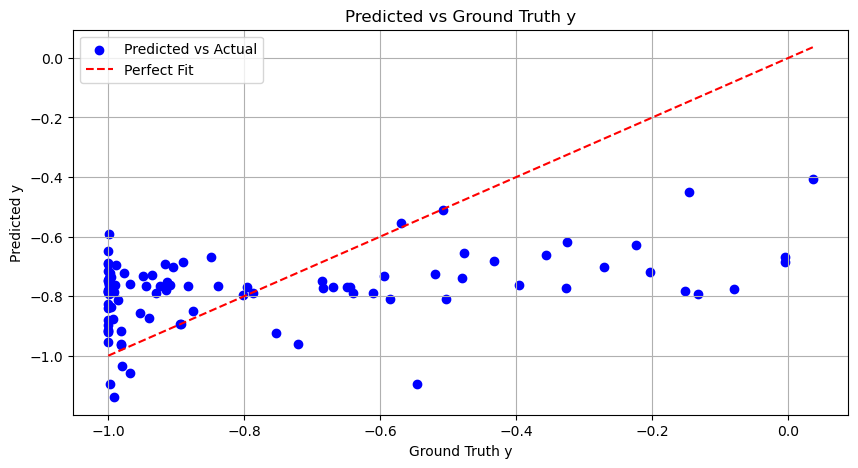

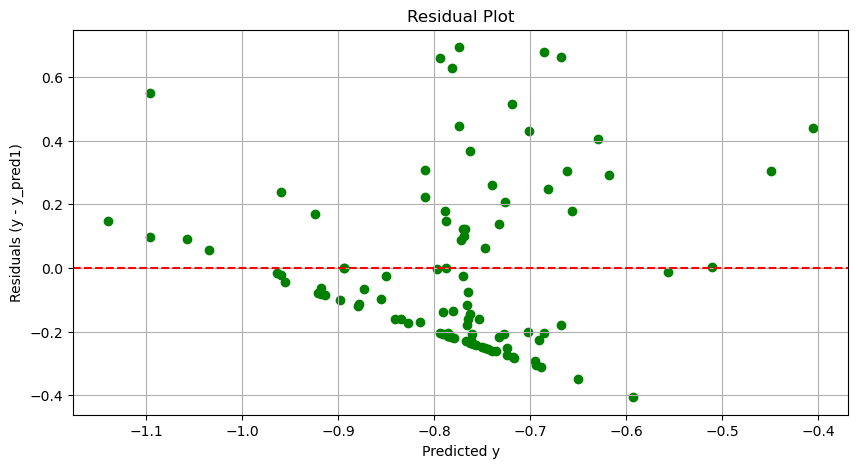

In [105]:
# Print the comparison metrics
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R-squared (R²): {r2}')

# 1. Scatter Plot: Ground Truth vs. Predicted
plt.figure(figsize=(10, 5))
plt.scatter(y1, y_pred1, color='blue', label='Predicted vs Actual')
plt.plot([min(y1), max(y1)], [min(y1), max(y1)], color='red', linestyle='--', label='Perfect Fit')
plt.xlabel('Ground Truth y')
plt.ylabel('Predicted y')
plt.title('Predicted vs Ground Truth y')
plt.legend()
plt.grid(True)
plt.show()

# 2. Residual Plot: Residuals (y1 - y_pred1)
residuals = y1 - y_pred1

plt.figure(figsize=(10, 5))
plt.scatter(y_pred1, residuals, color='green')
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted y')
plt.ylabel('Residuals (y - y_pred1)')
plt.title('Residual Plot')
plt.grid(True)
plt.show()

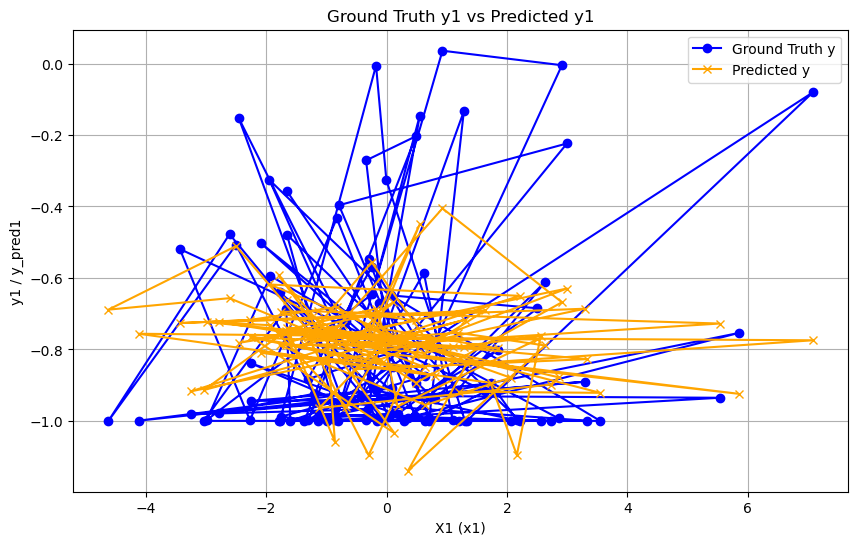

In [62]:
# Extract x1 from X for plotting
x1 = X1[:, 0]

# 1. Plot Ground Truth and Predicted Values against X (x1)
plt.figure(figsize=(10, 6))

plt.plot(x1, y1, label='Ground Truth y', color='blue', marker='o')  # Plot ground truth y
plt.plot(x1, y_pred1, label='Predicted y', color='orange', marker='x')  # Plot predicted y

plt.xlabel('X1 (x1)')
plt.ylabel('y1 / y_pred1')
plt.title('Ground Truth y1 vs Predicted y1')
plt.legend()
plt.grid(True)
plt.show()

The result of the first is saved as a csv file, but the second procedure yielded a better result based on score due to the initiation a custom operator

In [5]:
import pandas as pd
import math

In [23]:
# Define the equation
def discovered_equation(X):
    x1 = X[:, 0]  # First column of X (x1)
    x2 = X[:, 1]  # Second column of X (x2)
    
    # Apply the discovered equation
    term1 = np.cos(x2) * (x1 + (x1 * (-0.99996215 + (x1 * (x1 + (x1 + x1))))))
    term2 = np.sin(np.exp(1.54871))
    
    # Final prediction
    y_pred = term1 + term2
    return y_pred

# Make predictions using the equation
y_pred = discovered_equation(X)

# Print predicted values
print("Predicted Y values:", y_pred)

Predicted Y values: [-0.993867   -0.40939026  0.05389016 -0.95104933 -0.89257485 -0.99742256
  1.22824833 -0.9660185  -0.81160674  0.23241565 -0.68311815 -0.17485266
 -0.61693795  0.46279413 -0.99713887 -0.32670251  1.7662517  -0.81261049
 -0.14661566 -0.83868111 -0.9966215   0.42965053  0.08665569 -0.89826365
 -0.43148522  0.68071307  0.91204512 -0.11807054 -0.9998883  -0.99048974
  0.68014492 -0.99981396  1.97527257 -0.99997554  1.83796861 -0.99948933
 -0.87964545  0.16756907 -0.1156254   0.00477669 -0.96653468 -0.47779892
 -0.04108885 -0.68605055 -0.35031887  0.8260335  -0.92587031 -0.96555194
 -0.01184109 -0.40506919 -0.71137589 -0.37065135 -0.22641886  0.0957022
 -0.77210225 -0.71495691 -0.99896923 -0.31694704 -0.89532358 -0.70750155
 -0.63357396  1.4913287  -0.9970755  -0.31244071 -0.69298469 -0.52484832
  1.60758006 -0.98847794  1.17499413 -0.92930611 -0.99927168 -0.22139434
 -0.85962981 -0.57272595  0.40199395 -0.96942841 -0.30668591 -0.25244817
  1.07275571 -0.50598116 -0.9919

In [58]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [25]:
# Compare predictions with actual values
print("Ground Truth Y values:", y1)

# Calculate evaluation metrics
mae = mean_absolute_error(y1, y_pred)
mse = mean_squared_error(y1, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y1, y_pred)

# Print the comparison metrics
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R-squared (R²): {r2}')

Ground Truth Y values: [7.57214447e-02 2.07245910e-01 1.56303723e-01 7.87687914e-01
 5.67013917e-01 2.20074862e-01 2.60111223e-01 9.29805060e-01
 2.40445711e-01 4.70793928e-01 5.82355378e-01 3.45025185e-01
 4.67014758e-01 5.95964918e-01 7.10882119e-01 3.66498882e-01
 8.95882170e-01 4.39394719e-02 1.22611519e-02 4.56031549e-01
 2.73113524e-01 3.42954817e-01 9.47265884e-01 7.88849776e-02
 2.06561509e-01 3.84540411e-01 2.40352017e-01 8.22131244e-01
 7.89651259e-01 4.56417510e-01 5.20736848e-01 7.58982783e-01
 1.35167389e-01 3.59846570e-01 9.77458732e-01 7.64062785e-01
 1.98319495e-01 8.40432985e-01 3.82583549e-01 2.64946382e-01
 4.90313043e-01 5.38979276e-01 6.39655748e-04 1.97240725e-01
 2.72736899e-01 4.69965489e-01 1.90838539e-01 2.60165298e-01
 2.83568379e-02 7.25852430e-01 2.76855383e-01 5.15932046e-02
 6.53597443e-01 2.91226373e-02 2.67998562e-01 3.98100859e-02
 5.08237515e-01 6.22469933e-01 8.00956130e-01 7.57536828e-01
 2.36129287e-01 1.11345161e-01 4.64134050e-01 3.69367939e-01
 

In [6]:
import matplotlib.pyplot as plt

Mean Absolute Error (MAE): 0.9922524245422611
Mean Squared Error (MSE): 1.2521604060978193
Root Mean Squared Error (RMSE): 1.1189997346281273
R-squared (R²): -15.974813118064677


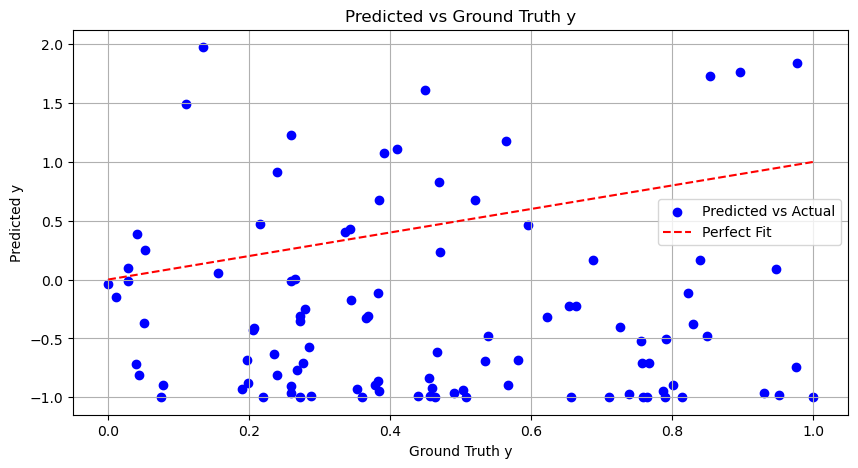

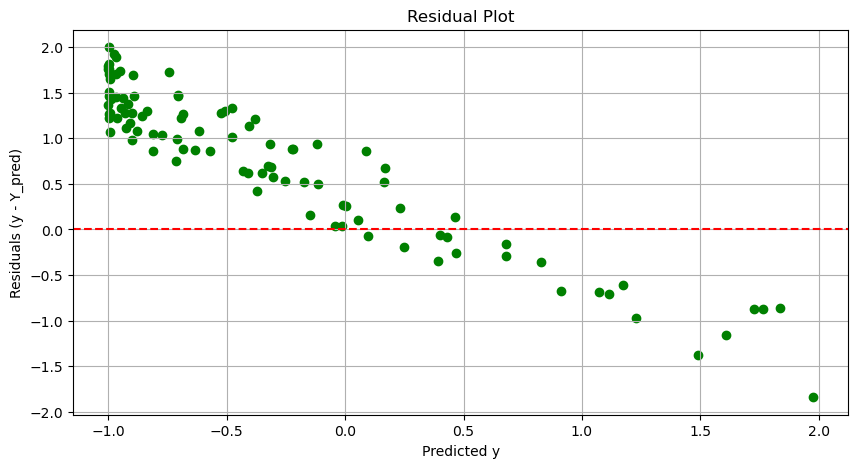

In [27]:
# Print the comparison metrics
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R-squared (R²): {r2}')

# 1. Scatter Plot: Ground Truth vs. Predicted
plt.figure(figsize=(10, 5))
plt.scatter(y1, y_pred, color='blue', label='Predicted vs Actual')
plt.plot([min(y1), max(y1)], [min(y1), max(y1)], color='red', linestyle='--', label='Perfect Fit')
plt.xlabel('Ground Truth y')
plt.ylabel('Predicted y')
plt.title('Predicted vs Ground Truth y')
plt.legend()
plt.grid(True)
plt.show()

# 2. Residual Plot: Residuals (y - y_pred)
residuals = y1 - y_pred

plt.figure(figsize=(10, 5))
plt.scatter(y_pred, residuals, color='green')
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted y')
plt.ylabel('Residuals (y - Y_pred)')
plt.title('Residual Plot')
plt.grid(True)
plt.show()

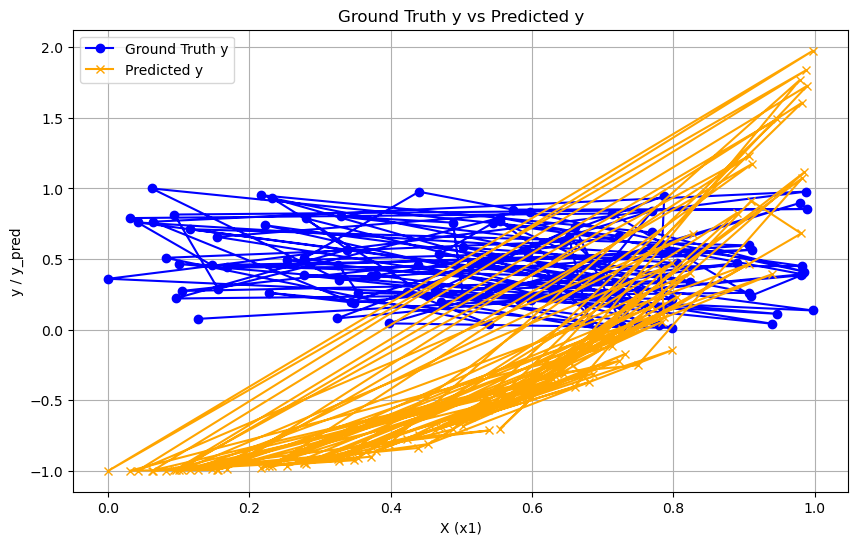

In [28]:

# Extract x1 from X for plotting
x1 = X[:, 0]

# 1. Plot Ground Truth and Predicted Values against X (x1)
plt.figure(figsize=(10, 6))

plt.plot(x1, y, label='Ground Truth y', color='blue', marker='o')  # Plot ground truth y
plt.plot(x1, y_pred, label='Predicted y', color='orange', marker='x')  # Plot predicted y

plt.xlabel('X (x1)')
plt.ylabel('y / y_pred')
plt.title('Ground Truth y vs Predicted y')
plt.legend()
plt.grid(True)
plt.show()

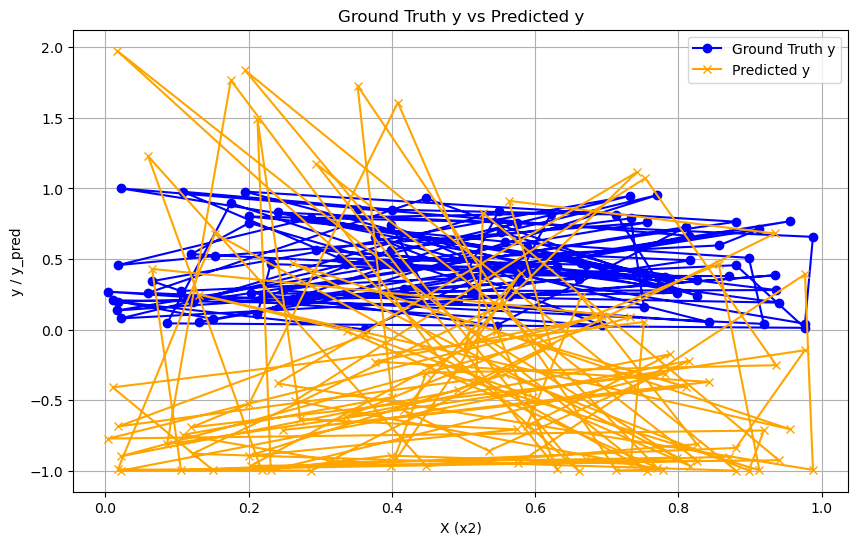

In [29]:
# Extract x2 from X for plotting
x2 = X[:, 1]

# 1. Plot Ground Truth and Predicted Values against X (x2)
plt.figure(figsize=(10, 6))

plt.plot(x2, y1, label='Ground Truth y', color='blue', marker='o')  # Plot ground truth y
plt.plot(x2, y_pred, label='Predicted y', color='orange', marker='x')  # Plot predicted y

plt.xlabel('X (x2)')
plt.ylabel('y / y_pred')
plt.title('Ground Truth y vs Predicted y')
plt.legend()
plt.grid(True)
plt.show()

TRYING THE FORMULA FROM THE SECOND EQUATION DISCOVERY PROCEDURE

In [31]:
# Define the equation
def discovered_equation(X):
    x0 = X[:, 0]  # First column of X (x0)
    x1 = X[:, 1]  # Second column of X (x1)
    
    # Apply the new discovered equation
    term1 = x1 * np.sin(np.sin(x0 + np.sin(x0)))
    term2 = np.cos(term1 * -1.336084 + -0.25184187)
    term3 = np.sin(np.sin(x1) + 0.53852195)
    
    # Final prediction using the new equation
    y_pred = np.sin(term2 * term3)
    
    return y_pred

# Make predictions using the new equation
y_pred4 = discovered_equation(X)

# Print predicted values
print("Predicted Y values:", y_pred4)


Predicted Y values: [0.56962255 0.48261448 0.41689143 0.6341186  0.62613481 0.60768803
 0.50957517 0.65982176 0.47598024 0.4755807  0.56243998 0.39380428
 0.59341566 0.33312103 0.74366362 0.56705509 0.55650341 0.52592263
 0.21415657 0.45325583 0.54526664 0.51235096 0.43066836 0.48987479
 0.56955554 0.27319377 0.52993154 0.50540626 0.64786185 0.48832997
 0.54879461 0.77584602 0.48615494 0.77366507 0.56215051 0.77696881
 0.54506212 0.53505955 0.55628159 0.55142486 0.63855068 0.53587456
 0.5802292  0.48751608 0.558359   0.54333926 0.50498692 0.58872919
 0.53864578 0.39073424 0.58431504 0.35854197 0.58191591 0.45843153
 0.47907975 0.35374402 0.76720353 0.54276183 0.57938201 0.57096261
 0.58642772 0.56598607 0.61354654 0.40680631 0.54044635 0.5676018
 0.5766292  0.70494593 0.57783932 0.57358636 0.49187264 0.37372157
 0.61452906 0.5901196  0.52056631 0.65324026 0.57461215 0.25929826
 0.42656851 0.58160634 0.71675933 0.74819741 0.58124087 0.58705326
 0.53591492 0.62527392 0.61715141 0.5614393

In [32]:
# Compare predictions with actual values
print("Ground Truth Y values:", y1)

# Calculate evaluation metrics
mae = mean_absolute_error(y1, y_pred4)
mse = mean_squared_error(y1, y_pred4)
rmse = np.sqrt(mse)
r2 = r2_score(y1, y_pred4)

# Print the comparison metrics
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R-squared (R²): {r2}')

Ground Truth Y values: [7.57214447e-02 2.07245910e-01 1.56303723e-01 7.87687914e-01
 5.67013917e-01 2.20074862e-01 2.60111223e-01 9.29805060e-01
 2.40445711e-01 4.70793928e-01 5.82355378e-01 3.45025185e-01
 4.67014758e-01 5.95964918e-01 7.10882119e-01 3.66498882e-01
 8.95882170e-01 4.39394719e-02 1.22611519e-02 4.56031549e-01
 2.73113524e-01 3.42954817e-01 9.47265884e-01 7.88849776e-02
 2.06561509e-01 3.84540411e-01 2.40352017e-01 8.22131244e-01
 7.89651259e-01 4.56417510e-01 5.20736848e-01 7.58982783e-01
 1.35167389e-01 3.59846570e-01 9.77458732e-01 7.64062785e-01
 1.98319495e-01 8.40432985e-01 3.82583549e-01 2.64946382e-01
 4.90313043e-01 5.38979276e-01 6.39655748e-04 1.97240725e-01
 2.72736899e-01 4.69965489e-01 1.90838539e-01 2.60165298e-01
 2.83568379e-02 7.25852430e-01 2.76855383e-01 5.15932046e-02
 6.53597443e-01 2.91226373e-02 2.67998562e-01 3.98100859e-02
 5.08237515e-01 6.22469933e-01 8.00956130e-01 7.57536828e-01
 2.36129287e-01 1.11345161e-01 4.64134050e-01 3.69367939e-01
 

Mean Absolute Error (MAE): 0.23340306007721856
Mean Squared Error (MSE): 0.07557278414165404
Root Mean Squared Error (RMSE): 0.27490504568242113
R-squared (R²): -0.024496447395417453


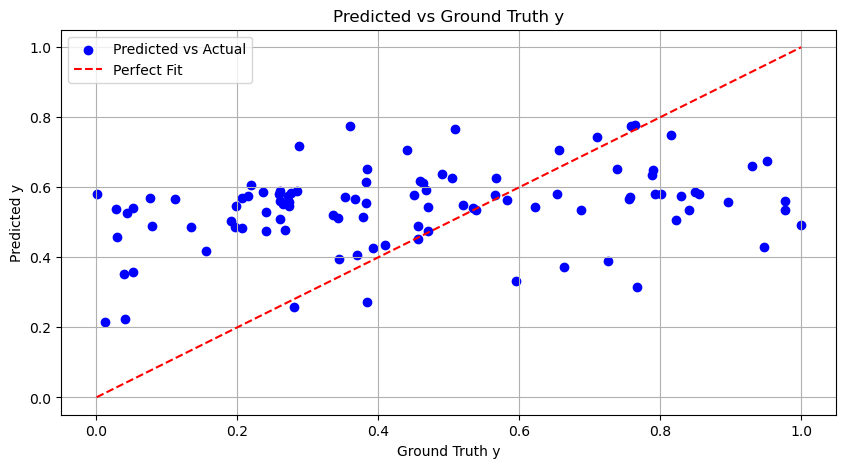

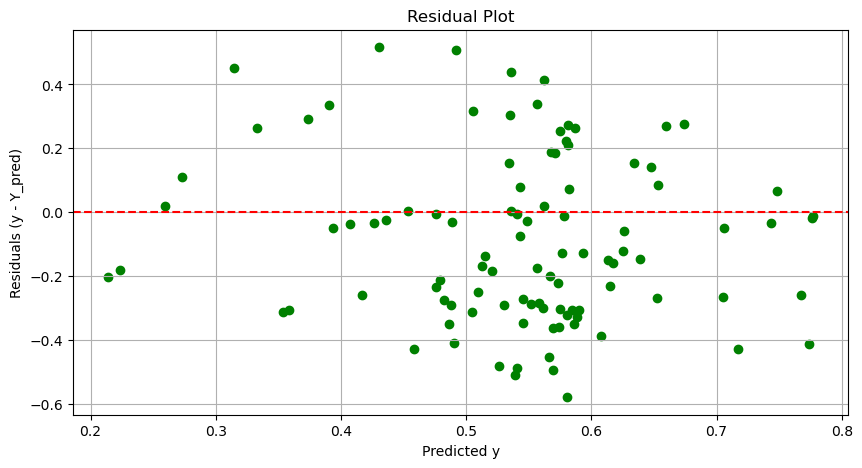

In [33]:
# Print the comparison metrics
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R-squared (R²): {r2}')

# 1. Scatter Plot: Ground Truth vs. Predicted
plt.figure(figsize=(10, 5))
plt.scatter(y1, y_pred4, color='blue', label='Predicted vs Actual')
plt.plot([min(y1), max(y1)], [min(y1), max(y1)], color='red', linestyle='--', label='Perfect Fit')
plt.xlabel('Ground Truth y')
plt.ylabel('Predicted y')
plt.title('Predicted vs Ground Truth y')
plt.legend()
plt.grid(True)
plt.show()

# 2. Residual Plot: Residuals (y - y_pred4)
residuals = y1 - y_pred4

plt.figure(figsize=(10, 5))
plt.scatter(y_pred4, residuals, color='green')
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted y')
plt.ylabel('Residuals (y - Y_pred)')
plt.title('Residual Plot')
plt.grid(True)
plt.show()

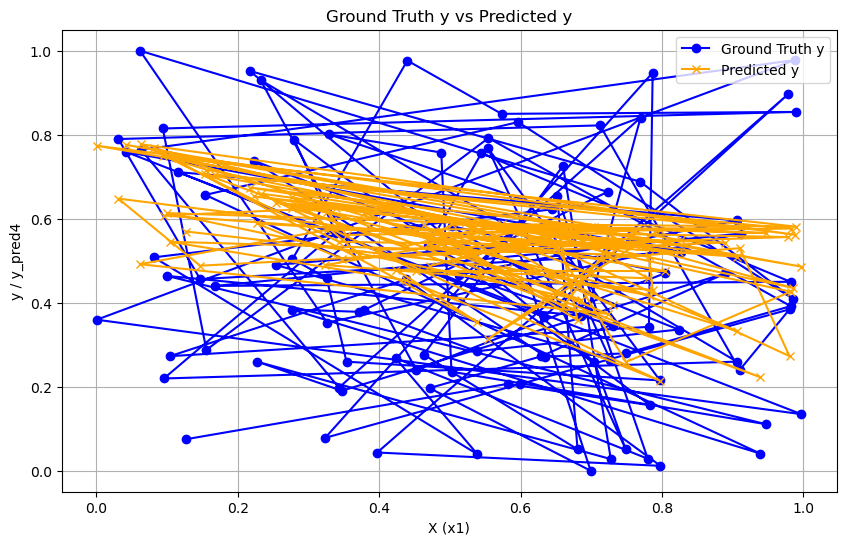

In [34]:
# Extract x1 from X for plotting
x1 = X[:, 0]

# 1. Plot Ground Truth and Predicted Values against X (x1)
plt.figure(figsize=(10, 6))

plt.plot(x1, y1, label='Ground Truth y', color='blue', marker='o')  # Plot ground truth y
plt.plot(x1, y_pred4, label='Predicted y', color='orange', marker='x')  # Plot predicted y

plt.xlabel('X (x1)')
plt.ylabel('y / y_pred4')
plt.title('Ground Truth y vs Predicted y')
plt.legend()
plt.grid(True)
plt.show()

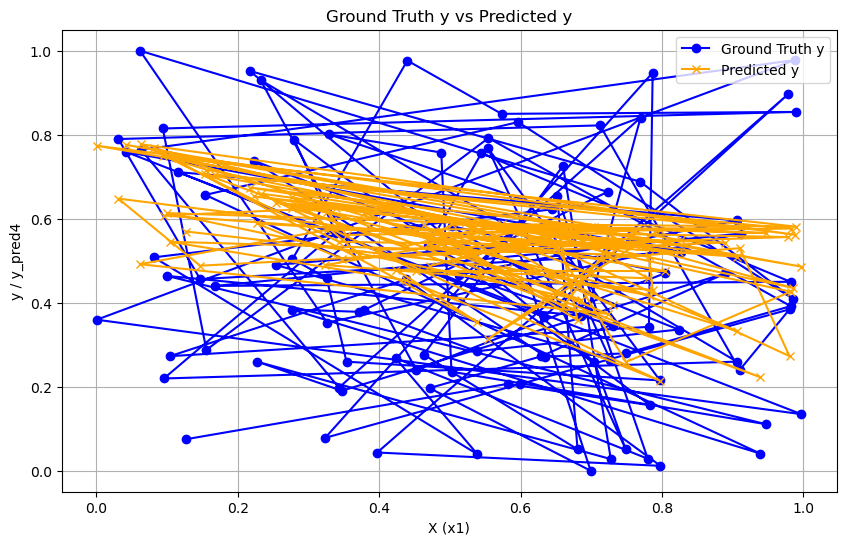

In [35]:
# Extract x1 from X for plotting
x2 = X[:, 1]

# 1. Plot Ground Truth and Predicted Values against X (x1)
plt.figure(figsize=(10, 6))

plt.plot(x1, y1, label='Ground Truth y', color='blue', marker='o')  # Plot ground truth y
plt.plot(x1, y_pred4, label='Predicted y', color='orange', marker='x')  # Plot predicted y

plt.xlabel('X (x1)')
plt.ylabel('y / y_pred4')
plt.title('Ground Truth y vs Predicted y')
plt.legend()
plt.grid(True)
plt.show()

TRYING THE SECOND ORDER TAYLOR SERIES EXPANSION OF THE EQUATION

In [35]:
# Define the discovered equation
def discovered_equation(x1):
    return -0.188 + 0.00003785 * x1 + 1.5 * x1**2

# Make predictions using the discovered equation
y_pred2 = discovered_equation(x1)

# Compare predictions with actual values
mae = mean_absolute_error(y1, y_pred2)
mse = mean_squared_error(y1, y_pred2)
rmse = np.sqrt(mse)
r2 = r2_score(y1, y_pred2)

# Print the comparison metrics
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R-squared (R²): {r2}')

Mean Absolute Error (MAE): 27.040666070038366
Mean Squared Error (MSE): 5051.861524566917
Root Mean Squared Error (RMSE): 71.07644845212032
R-squared (R²): -0.019002603687385156


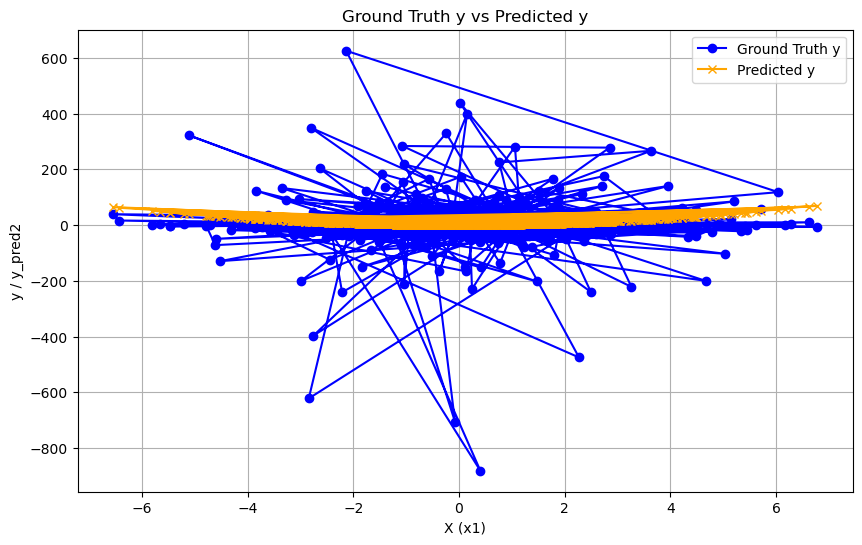

In [36]:
# Plot Ground Truth and Predicted Values against X (x1)
plt.figure(figsize=(10, 6))

plt.plot(x1, y1, label='Ground Truth y', color='blue', marker='o')  # Plot ground truth y
plt.plot(x1, y_pred2, label='Predicted y', color='orange', marker='x')  # Plot predicted y

plt.xlabel('X (x1)')
plt.ylabel('y / y_pred2')
plt.title('Ground Truth y vs Predicted y')
plt.legend()
plt.grid(True)
plt.show()

TRYING WITH REAL LIFE DATASET

In [7]:
import pandas as pd

In [37]:
df = pd.read_csv("Data/Automobile_data.csv")

In [38]:
df

symboling normalized-losses         make fuel-type aspiration  \
0            3                 ?  alfa-romero       gas        std   
1            3                 ?  alfa-romero       gas        std   
2            1                 ?  alfa-romero       gas        std   
3            2               164         audi       gas        std   
4            2               164         audi       gas        std   
..         ...               ...          ...       ...        ...   
200         -1                95        volvo       gas        std   
201         -1                95        volvo       gas      turbo   
202         -1                95        volvo       gas        std   
203         -1                95        volvo    diesel      turbo   
204         -1                95        volvo       gas      turbo   

    num-of-doors   body-style drive-wheels engine-location  wheel-base  ...  \
0            two  convertible          rwd           front        88.6  ...   
1            two  convertible          rwd           front        88.6  ...   
2            two    hatchback          rwd           front        94.5  ...   
3           four        sedan          fwd           front        99.8  ...   
4           four        sedan          4wd           front        99.4  ...   
..           ...          ...          ...             ...         ...  ...   
200         four        sedan          rwd           front       109.1  ...   
201         four        sedan          rwd           front       109.1  ...   
202         four        sedan          rwd           front       109.1  ...   
203         four        sedan          rwd           front       109.1  ...   
204         four        sedan          rwd           front       109.1  ...   

     engine-size  fuel-system  bore  stroke compression-ratio horsepower  \
0            130         mpfi  3.47    2.68               9.0        111   
1            130         mpfi  3.47    2.68               9.0        111   
2            152         mpfi  2.68    3.47               9.0        154   
3            109         mpfi  3.19     3.4              10.0        102   
4            136         mpfi  3.19     3.4               8.0        115   
..           ...          ...   ...     ...               ...        ...   
200          141         mpfi  3.78    3.15               9.5        114   
201          141         mpfi  3.78    3.15               8.7        160   
202          173         mpfi  3.58    2.87               8.8        134   
203          145          idi  3.01     3.4              23.0        106   
204          141         mpfi  3.78    3.15               9.5        114   

     peak-rpm city-mpg highway-mpg  price  
0        5000       21          27  13495  
1        5000       21          27  16500  
2        5000       19          26  16500  
3        5500       24          30  13950  
4        5500       18          22  17450  
..        ...      ...         ...    ...  
200      5400       23          28  16845  
201      5300       19          25  19045  
202      5500       18          23  21485  
203      4800       26          27  22470  
204      5400       19          25  22625  

[205 rows x 26 columns]

DATA WRANGLING AND FEATURE ENGINEERING TO MAKE THE DATASET NUMERICAL IN ORDER TO BE ABLE TO PERFORM EQUATION DISCOVERY ON IT

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [40]:
# Extracting the y, Ground Truth / Target variable from the dataset

y_RL = df["price"]

ANOTHER DATASET

In [8]:
df_wine = pd.read_csv("Data/winequality-red.csv")

In [64]:
df_wine

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
1594                 32.0                  44.0  0.99490  3.45       0.58   
1595                 39.0                  51.0  0.99512  3.52       0.76   
1596                 29.0                  40.0  0.99574  3.42       0.75   
1597                 32.0                  44.0  0.99547  3.57       0.71   
1598                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  quality  
0         9.4        5  
1         9.8        5  
2         9.8        5  
3         9.8        6  
4         9.4        5  
...       ...      ...  
1594     10.5        5  
1595     11.2        6  
1596     11.0        6  
1597     10.2        5  
1598     11.0        6  

[1599 rows x 12 columns]

In [9]:
df_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [10]:
df_wine["quality"].max()

8

In [11]:
y_wine = df_wine["quality"]

In [12]:
X_wine = df_wine.iloc[:, :-1].values  # Features (all rows, all columns except the last)

In [13]:
X_wine

array([[ 7.4  ,  0.7  ,  0.   , ...,  3.51 ,  0.56 ,  9.4  ],
       [ 7.8  ,  0.88 ,  0.   , ...,  3.2  ,  0.68 ,  9.8  ],
       [ 7.8  ,  0.76 ,  0.04 , ...,  3.26 ,  0.65 ,  9.8  ],
       ...,
       [ 6.3  ,  0.51 ,  0.13 , ...,  3.42 ,  0.75 , 11.   ],
       [ 5.9  ,  0.645,  0.12 , ...,  3.57 ,  0.71 , 10.2  ],
       [ 6.   ,  0.31 ,  0.47 , ...,  3.39 ,  0.66 , 11.   ]])

TRYING OUT THE SYMBOLI REGRESSION METHOD OF EQUATION DISCOVERY ON THE DATASET

In [79]:
from pysr import PySRRegressor

# Initialize the PySRRegressor with all available operators

# Generate variable names from x0 to x10
variable_names = [f'x{i}' for i in range(11)]

model = PySRRegressor(
    niterations=1000,  # Number of iterations (adjust as necessary)
    
    # List of binary operators (two inputs)
    binary_operators=[
        "+",    # Addition
        "-",    # Subtraction
        "*",    # Multiplication
        "/",    # Division
        "^",    # Power (alternative to **)
        "%",    # Modulo (remainder after division)
        "max",  # Maximum of two values
        "min",  # Minimum of two values
    ],
    
    # List of unary operators (one input)
    unary_operators=[
        "sin",      # Sine function
        "cos",      # Cosine function
        "tan",      # Tangent function
        "exp",      # Exponential function (e^x)
        "log",      # Natural logarithm (ln(x))
        "abs",      # Absolute value
        "sqrt",     # Square root
        "sign",     # Sign function (+1, 0, -1)
        "inv",      # Inverse (1/x)
        "square",   # Square of the value (x**2)
        "cube",     # Cube of the value (x**3)
    ],
    
    # Define any custom operators (optional)
    extra_sympy_mappings={"inv": lambda x: 1/x},  # Example of a custom operator
    variable_names=variable_names  # Provide variable names
)

# Fit the model with your dataset
model.fit(X_wine, y_wine)

# View the best equations discovered
equations = model.equations_
print("Discovered Equations:")
print(equations)



c:\Users\chidi\anaconda3\envs\boot_DA\lib\site-packages\pysr\sr.py:922: FutureWarning: `variable_names` is a data-dependent parameter and should be passed when fit is called. Ignoring parameter; please pass `variable_names` during the call to fit instead.
  warnings.warn(
c:\Users\chidi\anaconda3\envs\boot_DA\lib\site-packages\pysr\sr.py:2582: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(
c:\Users\chidi\anaconda3\envs\boot_DA\lib\site-packages\pysr\sr.py:2059: UserWarning: Note: you are running with 10 features or more. Genetic algorithms like used in PySR scale poorly with large numbers of features. You should run PySR for more `niterations` to ensure it can find the correct variables, and consider using a larger `maxsize`.
  warnings.warn(
c:\Users\chidi\anaconda3\envs\boot_DA\lib\site-packages\pysr\sr.py:73: UserWarning: You are using the `^` operator, but have not set up `constraints` for it. This may lead to over


Expressions evaluated per second: 5.700e+04
Head worker occupation: 22.1%
Progress: 136 / 15000 total iterations (0.907%)
Hall of Fame:
---------------------------------------------------------------------------------------------------
Complexity  Loss       Score     Equation
1           1.220e+01  1.594e+01  y = x₃
2           6.518e-01  2.930e+00  y = abs(5.6363)
3           6.492e-01  3.962e-03  y = 5.636 / x₇
4           5.051e-01  2.510e-01  y = abs(x₁₀ ^ 0.73776)
6           4.819e-01  2.349e-02  y = sqrt(exp(sqrt(x₁₀))) + x₉
7           4.569e-01  5.317e-02  y = (log(square(x₁₀)) / 0.75874) - x₁
8           4.569e-01  9.358e-06  y = abs((log(square(x₁₀)) / 0.75848) - x₁)
9           4.563e-01  1.278e-03  y = (log(square(x₁₀ - x₄)) / 0.75874) - x₁
11          4.557e-01  7.371e-04  y = abs(max(x₉, (log(x₁₀) / 0.37699) - (x₁ ^ x₉)))
12          4.468e-01  1.964e-02  y = 1.5564 * (((log(x₁₀ * x₁₀) / 1.0513) - 0.30331) - x₁)
15          4.446e-01  1.676e-03  y = max(0.15542, (log(x

In [80]:
equations

complexity      loss     score  \
0            1  0.651760  0.000000   
1            3  0.505061  0.127498   
2            5  0.467913  0.038198   
3            6  0.452823  0.032783   
4            7  0.441298  0.025781   
5            8  0.434232  0.016140   
6            9  0.429257  0.011525   
7           10  0.426336  0.006826   
8           11  0.422476  0.009095   
9           12  0.418143  0.010310   
10          13  0.414542  0.008649   
11          14  0.414541  0.000004   
12          15  0.413939  0.001452   
13          16  0.406967  0.016987   
14          17  0.406395  0.001407   
15          18  0.406306  0.000219   
16          20  0.403236  0.003792   

                                             equation  \
0                                            5.635949   
1                                     x10 ^ 0.7377849   
2                              (x10 ^ 0.7751038) - x1   
3                          exp(x10 ^ 0.25550094) - x1   
4                       (x10 ^ 0.7274747) - (x1 - x9)   
5                  (x10 ^ 0.7317668) - (x1 - sin(x9))   
6     (x10 ^ 0.72884554) - (x1 - min(x9, 0.83156425))   
7   (x10 ^ 0.72884554) - tan(x1 - min(x9, 0.831564...   
8   ((1.9572898 + x10) ^ 0.6794542) - (x1 - min(0....   
9   ((1.9515293 + x10) ^ 0.67123234) - (x1 - tan(m...   
10  ((1.9667075 + x10) ^ 0.67123234) - tan(x1 - ta...   
11  ((cube(1.2557999) + x10) ^ 0.67123234) - tan(x...   
12  ((1.9515293 + x10) ^ 0.67123234) - tan(x1 - ta...   
13  ((1.9515293 + x10) ^ 0.67123234) - (x1 - tan(m...   
14  ((1.9515293 + x10) ^ 0.67123234) - tan(x1 - ta...   
15  ((1.9515293 + (x10 - -0.25893846)) ^ 0.6712323...   
16  ((1.9515293 + x10) ^ 0.67123234) - tan(x1 - mi...   

                                         sympy_format  \
0                                    5.63594900000000   
1                                      x10**0.7377849   
2                                -x1 + x10**0.7751038   
3                          -x1 + exp(x10**0.25550094)   
4                          x10**0.7274747 - (x1 - x9)   
5                     x10**0.7317668 - (x1 - sin(x9))   
6   x10**0.72884554 - (x1 - Piecewise((x9, x9 < 0....   
7   x10**0.72884554 - tan(x1 - Piecewise((x9, x9 <...   
8   -(x1 - Piecewise((0.83156425, x9 > 0.83156425)...   
9   -(x1 - tan(Piecewise((x9, x9 < 0.7565608), (0....   
10  (x10 + 1.9667075)**0.67123234 - tan(x1 - tan(P...   
11  (x10 + 1.98043837200195)**0.67123234 - tan(x1 ...   
12  (x10 + 1.9515293)**0.67123234 - tan(x1 - tan(P...   
13  -(x1 - tan(Piecewise((x9, x9 < (0.74943185**0....   
14  (x10 + 1.9515293)**0.67123234 - tan(x1 - tan(P...   
15  -(x1 - tan(Piecewise((x9, x9 < (0.74943185**0....   
16  (x10 + 1.9515293)**0.67123234 - tan(x1 - Piece...   

                                        lambda_format  
0                   PySRFunction(X=>5.63594900000000)  
1                     PySRFunction(X=>x10**0.7377849)  
2               PySRFunction(X=>-x1 + x10**0.7751038)  
3         PySRFunction(X=>-x1 + exp(x10**0.25550094))  
4         PySRFunction(X=>x10**0.7274747 - (x1 - x9))  
5    PySRFunction(X=>x10**0.7317668 - (x1 - sin(x9)))  
6   PySRFunction(X=>x10**0.72884554 - (x1 - Piecew...  
7   PySRFunction(X=>x10**0.72884554 - tan(x1 - Pie...  
8   PySRFunction(X=>-(x1 - Piecewise((0.83156425, ...  
9   PySRFunction(X=>-(x1 - tan(Piecewise((x9, x9 <...  
10  PySRFunction(X=>(x10 + 1.9667075)**0.67123234 ...  
11  PySRFunction(X=>(x10 + 1.98043837200195)**0.67...  
12  PySRFunction(X=>(x10 + 1.9515293)**0.67123234 ...  
13  PySRFunction(X=>-(x1 - tan(Piecewise((x9, x9 <...  
14  PySRFunction(X=>(x10 + 1.9515293)**0.67123234 ...  
15  PySRFunction(X=>-(x1 - tan(Piecewise((x9, x9 <...  
16  PySRFunction(X=>(x10 + 1.9515293)**0.67123234 ...

In [81]:
# Get the best equation (with the lowest loss)
best_equation = model.get_best()
print("Best equation:", best_equation)


Best equation: complexity                                     3
loss                                    0.505061
score                                   0.127498
equation                         x10 ^ 0.7377849
sympy_format                      x10**0.7377849
lambda_format    PySRFunction(X=>x10**0.7377849)
Name: 1, dtype: object


In [83]:
best_equation

complexity                                     3
loss                                    0.505061
score                                   0.127498
equation                         x10 ^ 0.7377849
sympy_format                      x10**0.7377849
lambda_format    PySRFunction(X=>x10**0.7377849)
Name: 1, dtype: object

In [89]:
import sympy as sp

# Convert SymPy equation to a string
sympy_eq_str = str(sympy_eq)

# Replace all instances of ^ with **
sympy_eq_str_fixed = sympy_eq_str.replace('^', '**')

# Convert the string back to a SymPy expression
sympy_eq_fixed = sp.sympify(sympy_eq_str_fixed)

# Proceed with lambdification
func = sp.lambdify(variable_names, sympy_eq_fixed, "numpy")

# Make predictions using the discovered equation
y_pred_wine = func(*X_wine.T)  # Transpose X so that it fits the function input

# Print the equation and its predictions
print(f"Equation {i+1}: {sympy_eq_fixed}")
print("Predicted Y values:", y_pred_wine)


Equation 2: x10**0.7377849
Predicted Y values: [5.22346917 5.3865616  5.3865616  ... 5.86575336 5.54791728 5.86575336]


In [90]:
import sympy as sp

# Iterate through discovered equations and make predictions
for i, row in model.equations_.iterrows():
    # Get the equation as a SymPy object
    sympy_eq = row['equation']
    
    # Convert SymPy equation to a string
    sympy_eq_str = str(sympy_eq)
    
    # Replace all instances of ^ with ** (for exponentiation)
    sympy_eq_str_fixed = sympy_eq_str.replace('^', '**')
    
    # Convert the string back to a SymPy expression
    sympy_eq_fixed = sp.sympify(sympy_eq_str_fixed)
    
    # Convert it into a Python function using sympy.lambdify
    func = sp.lambdify(variable_names, sympy_eq_fixed, "numpy")
    
    # Make predictions using the discovered equation
    y_pred_wine = func(*X_wine.T)  # Transpose X so that it fits the function input
    
    # Print the equation and its predictions
    print(f"Equation {i+1}: {sympy_eq_fixed}")
    print(f"Predicted Y values: {y_pred_wine}\n")


Equation 1: 5.63594900000000
Predicted Y values: 5.635949

Equation 2: x10**0.7377849
Predicted Y values: [5.22346917 5.3865616  5.3865616  ... 5.86575336 5.54791728 5.86575336]

Equation 3: -x1 + x10**0.7751038
Predicted Y values: [4.97904222 4.98547378 5.10547378 ... 5.90486362 5.40520132 6.10486362]

Equation 4: -x1 + exp(x10**0.25550094)
Predicted Y values: [5.18672216 5.11949222 5.23949222 ... 5.82026285 5.46594959 6.02026285]

Equation 5: -x1 + x10**0.7274747 + x9
Predicted Y values: [4.96417896 5.06128578 5.15128578 ... 5.96251357 5.48165415 6.07251357]

Equation 6: -x1 + x10**0.7317668 + sin(x9)
Predicted Y values: [4.98469065 5.06187276 5.15826614 ... 5.9533526  5.4777507  6.08483069]



ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (2,) + inhomogeneous part.

In [92]:
import numpy as np

# Iterate through discovered equations and make predictions
for i, row in model.equations_.iterrows():
    # Get the equation as a SymPy object
    sympy_eq = row['equation']
    
    # Convert SymPy equation to a string
    sympy_eq_str = str(sympy_eq)
    
    # Replace all instances of ^ with ** (for exponentiation)
    sympy_eq_str_fixed = sympy_eq_str.replace('^', '**')
    
    # Replace amin with np.min to ensure correct operation
    sympy_eq_str_fixed = sympy_eq_str_fixed.replace('amin', 'np.min')
    
    # Convert the string back to a SymPy expression
    sympy_eq_fixed = sp.sympify(sympy_eq_str_fixed)
    
    # Convert it into a Python function using sympy.lambdify
    func = sp.lambdify(variable_names, sympy_eq_fixed, modules=["numpy"])
    
    # Make predictions using the discovered equation
    try:
        y_pred_wine = func(*X_wine.T)  # Transpose X so that it fits the function input
        # Print the equation and its predictions
        print(f"Equation {i+1}: {sympy_eq_fixed}")
        print(f"Predicted Y values: {y_pred_wine}\n")
    except ValueError as e:
        print(f"Error in Equation {i+1}: {e}")


Equation 1: 5.63594900000000
Predicted Y values: 5.635949

Equation 2: x10**0.7377849
Predicted Y values: [5.22346917 5.3865616  5.3865616  ... 5.86575336 5.54791728 5.86575336]

Equation 3: -x1 + x10**0.7751038
Predicted Y values: [4.97904222 4.98547378 5.10547378 ... 5.90486362 5.40520132 6.10486362]

Equation 4: -x1 + exp(x10**0.25550094)
Predicted Y values: [5.18672216 5.11949222 5.23949222 ... 5.82026285 5.46594959 6.02026285]

Equation 5: -x1 + x10**0.7274747 + x9
Predicted Y values: [4.96417896 5.06128578 5.15128578 ... 5.96251357 5.48165415 6.07251357]

Equation 6: -x1 + x10**0.7317668 + sin(x9)
Predicted Y values: [4.98469065 5.06187276 5.15826614 ... 5.9533526  5.4777507  6.08483069]

Error in Equation 7: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (2,) + inhomogeneous part.
Error in Equation 8: setting an array element with a sequence. The requested array has an inhomogeneous shape after 

NameError: name 'cube' is not defined

In [93]:
import numpy as np
import sympy as sp

# Define cube function
def cube(x):
    return np.power(x, 3)

# Iterate through discovered equations and make predictions
for i, row in model.equations_.iterrows():
    # Get the equation as a SymPy object
    sympy_eq = row['equation']
    
    # Convert SymPy equation to a string
    sympy_eq_str = str(sympy_eq)
    
    # Replace all instances of ^ with ** (for exponentiation)
    sympy_eq_str_fixed = sympy_eq_str.replace('^', '**')
    
    # Replace amin with np.min to ensure correct operation
    sympy_eq_str_fixed = sympy_eq_str_fixed.replace('amin', 'np.min')
    
    # Convert the string back to a SymPy expression
    sympy_eq_fixed = sp.sympify(sympy_eq_str_fixed)
    
    # Convert it into a Python function using sympy.lambdify
    func = sp.lambdify(variable_names, sympy_eq_fixed, modules=[{"cube": cube}, "numpy"])
    
    # Make predictions using the discovered equation
    try:
        y_pred_wine = func(*X_wine.T)  # Transpose X so that it fits the function input
        # Print the equation and its predictions
        print(f"Equation {i+1}: {sympy_eq_fixed}")
        print(f"Predicted Y values: {y_pred_wine}\n")
    except ValueError as e:
        print(f"Error in Equation {i+1}: {e}")


Equation 1: 5.63594900000000
Predicted Y values: 5.635949

Equation 2: x10**0.7377849
Predicted Y values: [5.22346917 5.3865616  5.3865616  ... 5.86575336 5.54791728 5.86575336]

Equation 3: -x1 + x10**0.7751038
Predicted Y values: [4.97904222 4.98547378 5.10547378 ... 5.90486362 5.40520132 6.10486362]

Equation 4: -x1 + exp(x10**0.25550094)
Predicted Y values: [5.18672216 5.11949222 5.23949222 ... 5.82026285 5.46594959 6.02026285]

Equation 5: -x1 + x10**0.7274747 + x9
Predicted Y values: [4.96417896 5.06128578 5.15128578 ... 5.96251357 5.48165415 6.07251357]

Equation 6: -x1 + x10**0.7317668 + sin(x9)
Predicted Y values: [4.98469065 5.06187276 5.15826614 ... 5.9533526  5.4777507  6.08483069]

Error in Equation 7: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (2,) + inhomogeneous part.
Error in Equation 8: setting an array element with a sequence. The requested array has an inhomogeneous shape after 

In [96]:
import numpy as np
import sympy as sp
import pandas as pd

# Define cube function
def cube(x):
    return np.power(x, 3)

# Dictionary to store predictions for each equation
predictions_dict = {}

# Iterate through discovered equations and make predictions
for i, row in model.equations_.iterrows():
    # Get the equation as a SymPy object
    sympy_eq = row['equation']
    
    # Convert SymPy equation to a string
    sympy_eq_str = str(sympy_eq)
    
    # Replace all instances of ^ with ** (for exponentiation)
    sympy_eq_str_fixed = sympy_eq_str.replace('^', '**')
    
    # Replace amin with np.min to ensure correct operation
    sympy_eq_str_fixed = sympy_eq_str_fixed.replace('amin', 'np.min')
    
    # Convert the string back to a SymPy expression
    sympy_eq_fixed = sp.sympify(sympy_eq_str_fixed)
    
    # Convert it into a Python function using sympy.lambdify
    func = sp.lambdify(variable_names, sympy_eq_fixed, modules=[{"cube": cube}, "numpy"])
    
    # Make predictions using the discovered equation
    try:
        y_pred_wine = func(*X_wine.T)  # Transpose X so that it fits the function input
        
        # Create a name for the series based on the equation number
        equation_name = f"Equation_{i+1}"
        
        # Store the predictions in the dictionary as a pandas Series
        predictions_dict[equation_name] = pd.Series(y_pred_wine, name=equation_name)
        
        # Print the equation and its predictions
        print(f"Equation {i+1}: {sympy_eq_fixed}")
        print(f"Predicted Y values: {y_pred_wine}\n")
    
    except Exception as e:
        print(f"Error in Equation {i+1}: {str(e)}")

# Create a DataFrame from the dictionary of predictions
predictions_df = pd.DataFrame(predictions_dict)

# Display the resulting DataFrame
print(predictions_df.head())


Equation 1: 5.63594900000000
Predicted Y values: 5.635949

Equation 2: x10**0.7377849
Predicted Y values: [5.22346917 5.3865616  5.3865616  ... 5.86575336 5.54791728 5.86575336]

Equation 3: -x1 + x10**0.7751038
Predicted Y values: [4.97904222 4.98547378 5.10547378 ... 5.90486362 5.40520132 6.10486362]

Equation 4: -x1 + exp(x10**0.25550094)
Predicted Y values: [5.18672216 5.11949222 5.23949222 ... 5.82026285 5.46594959 6.02026285]

Equation 5: -x1 + x10**0.7274747 + x9
Predicted Y values: [4.96417896 5.06128578 5.15128578 ... 5.96251357 5.48165415 6.07251357]

Equation 6: -x1 + x10**0.7317668 + sin(x9)
Predicted Y values: [4.98469065 5.06187276 5.15826614 ... 5.9533526  5.4777507  6.08483069]

Error in Equation 7: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (2,) + inhomogeneous part.
Error in Equation 8: setting an array element with a sequence. The requested array has an inhomogeneous shape after 

In [97]:
predictions_df 

Equation_1  Equation_2  Equation_3  Equation_4  Equation_5  Equation_6  \
0       5.635949    5.223469    4.979042    5.186722    4.964179    4.984691   
1            NaN    5.386562    4.985474    5.119492    5.061286    5.061873   
2            NaN    5.386562    5.105474    5.239492    5.151286    5.158266   
3            NaN    5.386562    5.585474    5.719492    5.561286    5.581104   
4            NaN    5.223469    4.979042    5.186722    4.964179    4.984691   
...          ...         ...         ...         ...         ...         ...   
1594         NaN    5.667846    5.587678    5.593733    5.512092    5.536230   
1595         NaN    5.944252    5.955084    5.834396    6.008018    5.997374   
1596         NaN    5.865753    5.904864    5.820263    5.962514    5.953353   
1597         NaN    5.547917    5.405201    5.465950    5.481654    5.477751   
1598         NaN    5.865753    6.104864    6.020263    6.072514    6.084831   

      Equation_13  Equation_14  Equation_15  Equation_16  
0        5.034063     5.034194     5.034063     5.112102  
1        5.155895     5.125727     5.125376     5.134375  
2        5.227559     5.227559     5.227559     5.304595  
3        5.621176     5.602523     5.621176     5.679559  
4        5.034063     5.034194     5.034063     5.112102  
...           ...          ...          ...          ...  
1594     5.489591     5.489535     5.489591     5.565135  
1595     6.060910     5.982570     5.996941     5.991824  
1596     6.028382     6.001489     6.028382     6.075810  
1597     5.564010     5.560657     5.564010     5.636859  
1598     6.082968     6.045998     6.082968     6.120635  

[1599 rows x 10 columns]

In [100]:
# Drop the column 'Equation_1' from the DataFrame
predictions_df = predictions_df.drop("Equation_1", axis=1)

In [101]:
predictions_df

Equation_2  Equation_3  Equation_4  Equation_5  Equation_6  Equation_13  \
0       5.223469    4.979042    5.186722    4.964179    4.984691     5.034063   
1       5.386562    4.985474    5.119492    5.061286    5.061873     5.155895   
2       5.386562    5.105474    5.239492    5.151286    5.158266     5.227559   
3       5.386562    5.585474    5.719492    5.561286    5.581104     5.621176   
4       5.223469    4.979042    5.186722    4.964179    4.984691     5.034063   
...          ...         ...         ...         ...         ...          ...   
1594    5.667846    5.587678    5.593733    5.512092    5.536230     5.489591   
1595    5.944252    5.955084    5.834396    6.008018    5.997374     6.060910   
1596    5.865753    5.904864    5.820263    5.962514    5.953353     6.028382   
1597    5.547917    5.405201    5.465950    5.481654    5.477751     5.564010   
1598    5.865753    6.104864    6.020263    6.072514    6.084831     6.082968   

      Equation_14  Equation_15  Equation_16  
0        5.034194     5.034063     5.112102  
1        5.125727     5.125376     5.134375  
2        5.227559     5.227559     5.304595  
3        5.602523     5.621176     5.679559  
4        5.034194     5.034063     5.112102  
...           ...          ...          ...  
1594     5.489535     5.489591     5.565135  
1595     5.982570     5.996941     5.991824  
1596     6.001489     6.028382     6.075810  
1597     5.560657     5.564010     5.636859  
1598     6.045998     6.082968     6.120635  

[1599 rows x 9 columns]

In [103]:
y_wine

0       5
1       5
2       5
3       6
4       5
       ..
1594    5
1595    6
1596    6
1597    5
1598    6
Name: quality, Length: 1599, dtype: int64

COMPARISON OF EACH **Y_PRED** WITH THE GROUND TRUTH **Y** TO CHECK THE PERFORMANCE OF EACH DISCOVERED EQUATION


Comparison for Equation_2:
Mean Absolute Error (MAE): 0.5556976972259667
Mean Squared Error (MSE): 0.5050616059774803
Root Mean Squared Error (RMSE): 0.7106768646702102
R-squared (R²): 0.22508103036036042


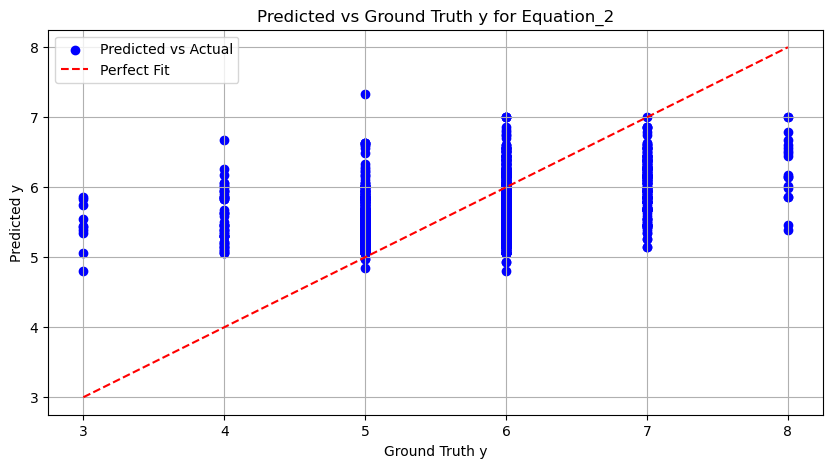

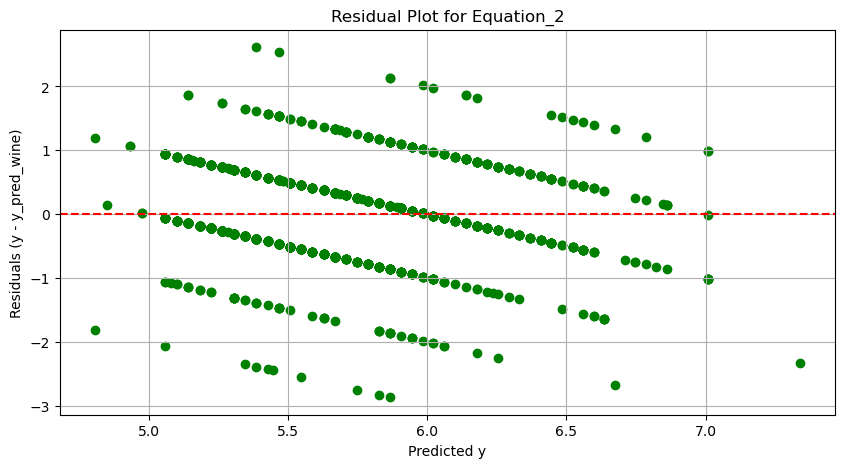


Comparison for Equation_3:
Mean Absolute Error (MAE): 0.5204481789810452
Mean Squared Error (MSE): 0.4679135091908901
Root Mean Squared Error (RMSE): 0.6840420375904467
R-squared (R²): 0.28207757205991224


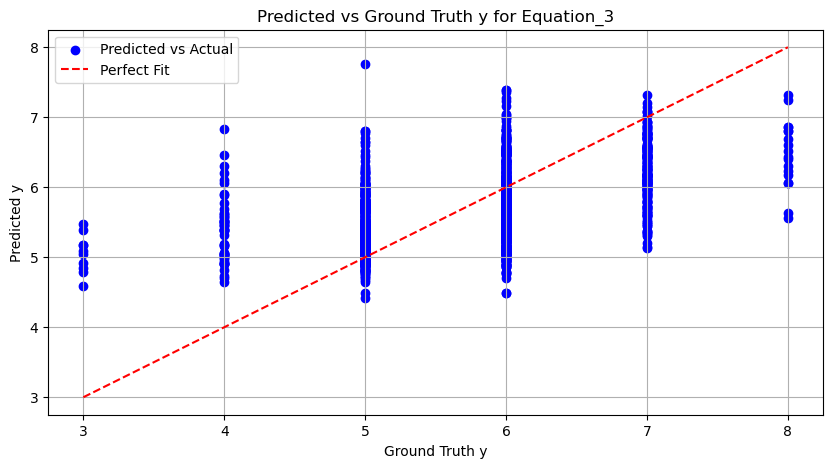

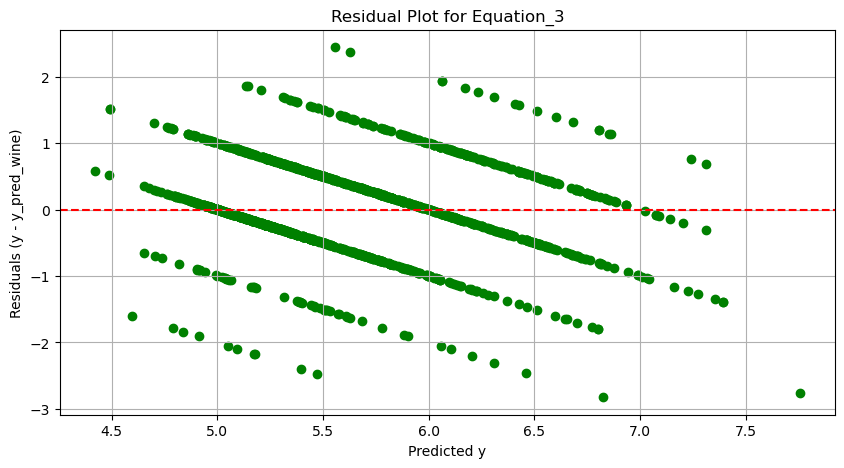


Comparison for Equation_4:
Mean Absolute Error (MAE): 0.5382411343485632
Mean Squared Error (MSE): 0.4528226432092487
Root Mean Squared Error (RMSE): 0.6729209784285587
R-squared (R²): 0.3052315758072983


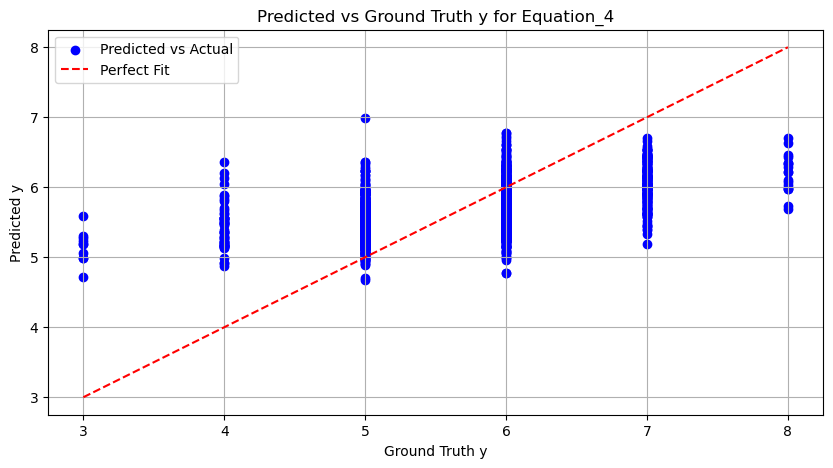

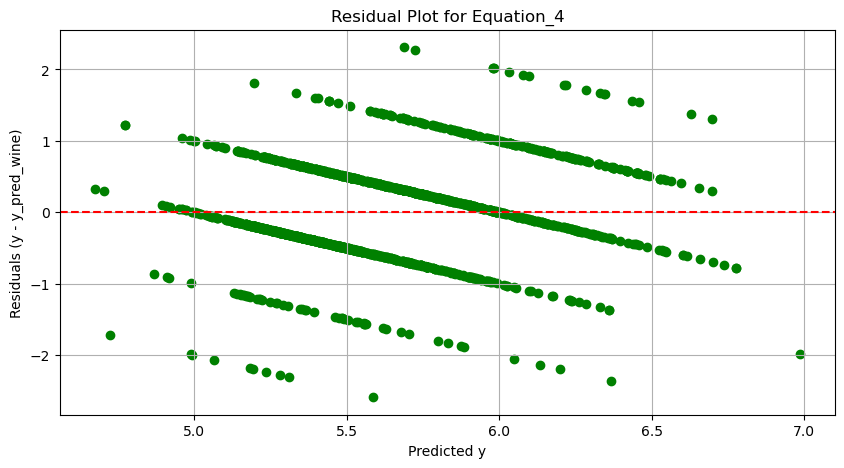


Comparison for Equation_5:
Mean Absolute Error (MAE): 0.5099851485135823
Mean Squared Error (MSE): 0.44129791791722134
Root Mean Squared Error (RMSE): 0.6643025800922508
R-squared (R²): 0.32291402908226774


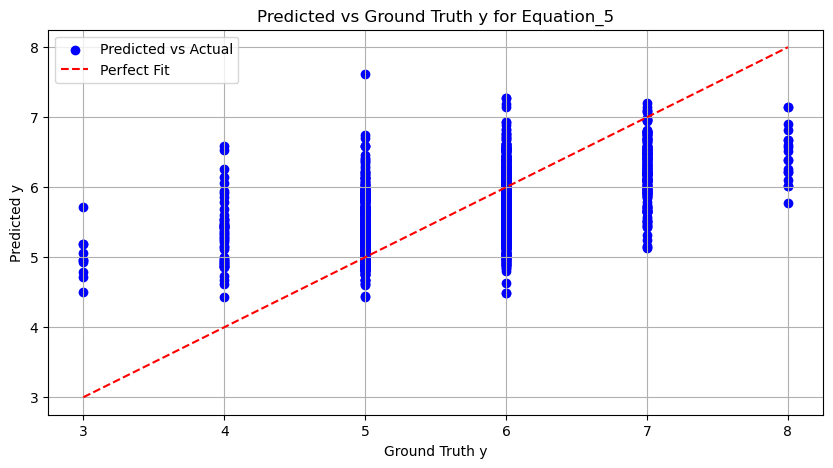

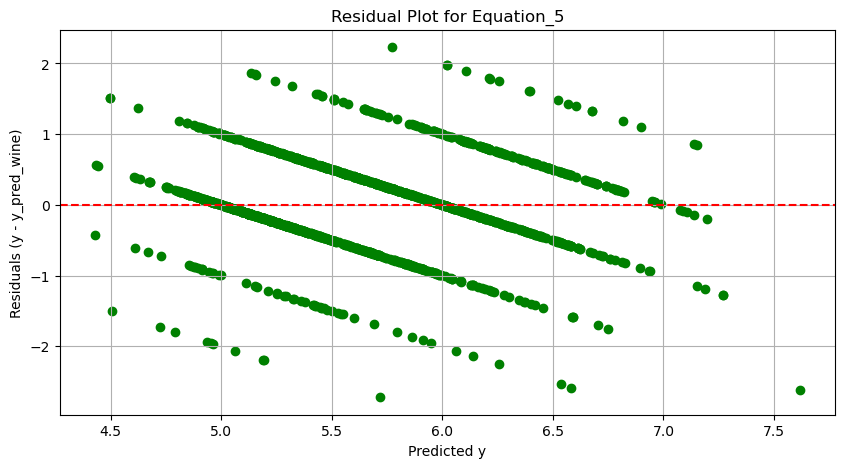


Comparison for Equation_6:
Mean Absolute Error (MAE): 0.5072705414693022
Mean Squared Error (MSE): 0.43423251905329585
Root Mean Squared Error (RMSE): 0.6589632152505145
R-squared (R²): 0.3337545117935399


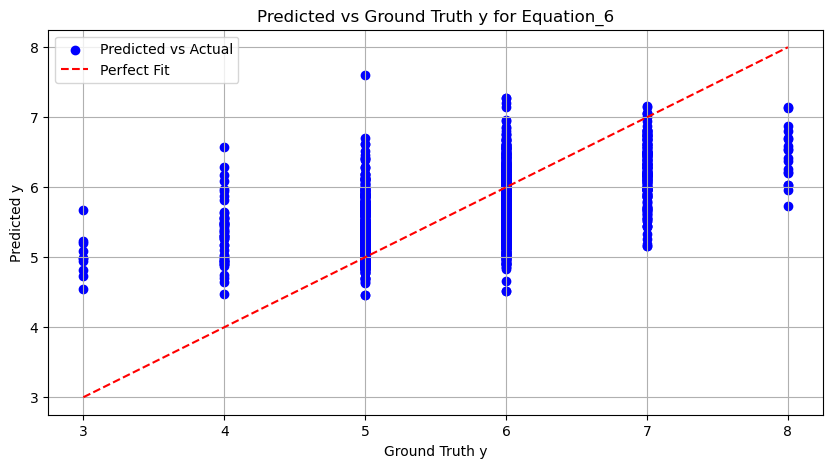

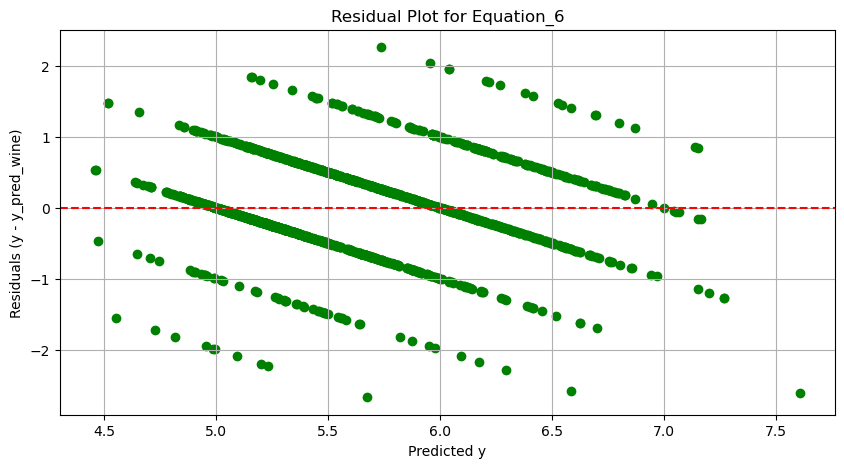


Comparison for Equation_13:
Mean Absolute Error (MAE): 0.5001455174287944
Mean Squared Error (MSE): 0.4139394779882098
Root Mean Squared Error (RMSE): 0.6433812850776822
R-squared (R²): 0.36489024313185214


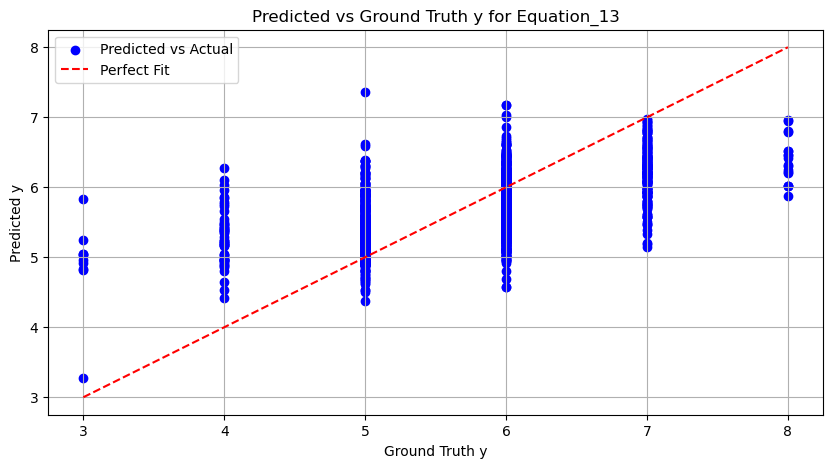

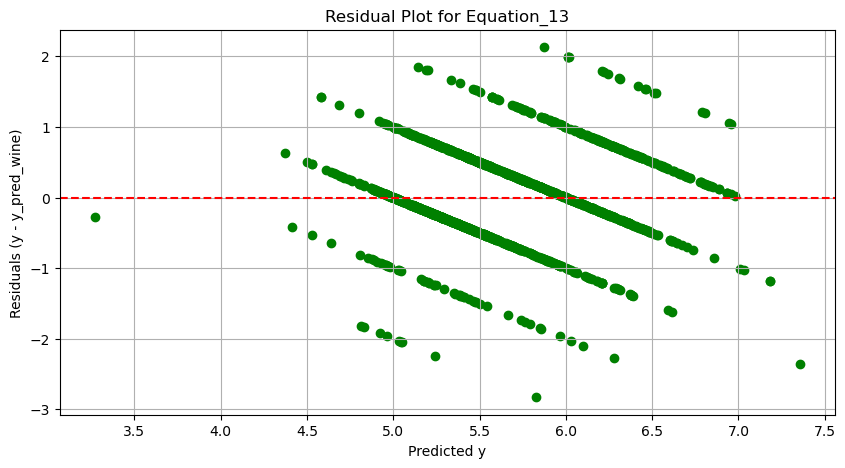


Comparison for Equation_14:
Mean Absolute Error (MAE): 0.4915815899920737
Mean Squared Error (MSE): 0.40696698284656435
Root Mean Squared Error (RMSE): 0.6379396388739019
R-squared (R²): 0.3755881831198349


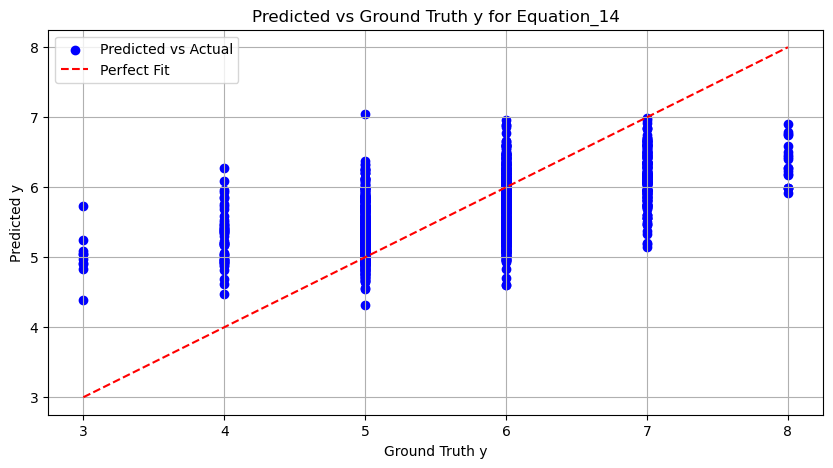

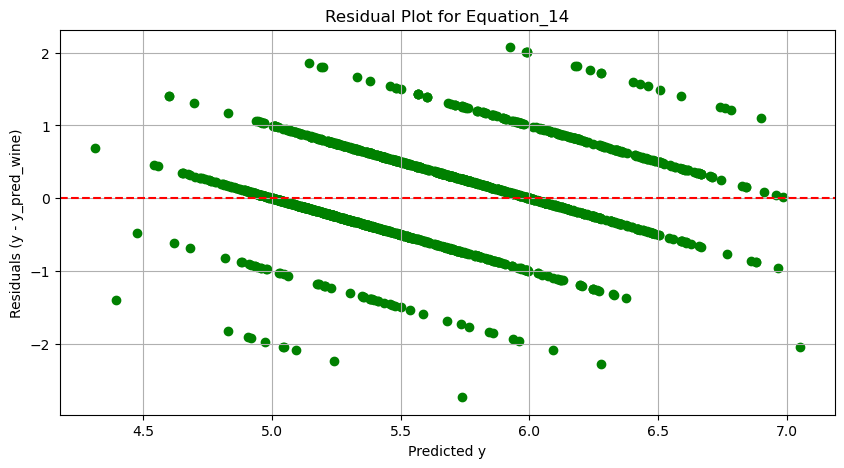


Comparison for Equation_15:
Mean Absolute Error (MAE): 0.4910715620478565
Mean Squared Error (MSE): 0.4063947669678446
Root Mean Squared Error (RMSE): 0.637490993636651
R-squared (R²): 0.3764661372820618


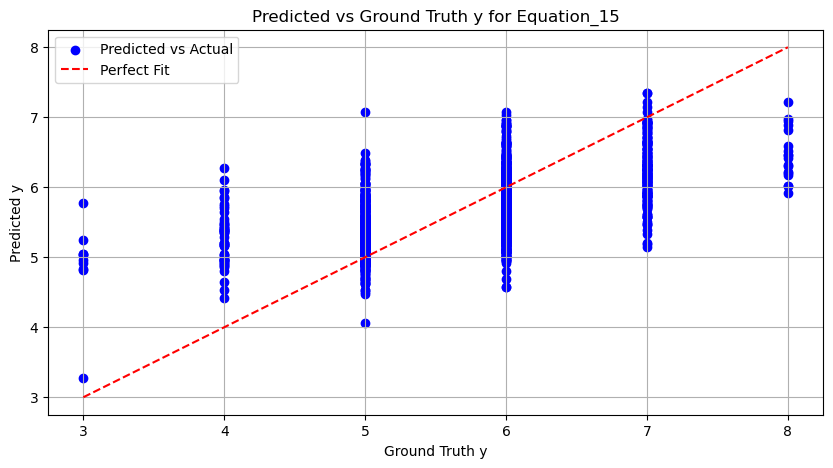

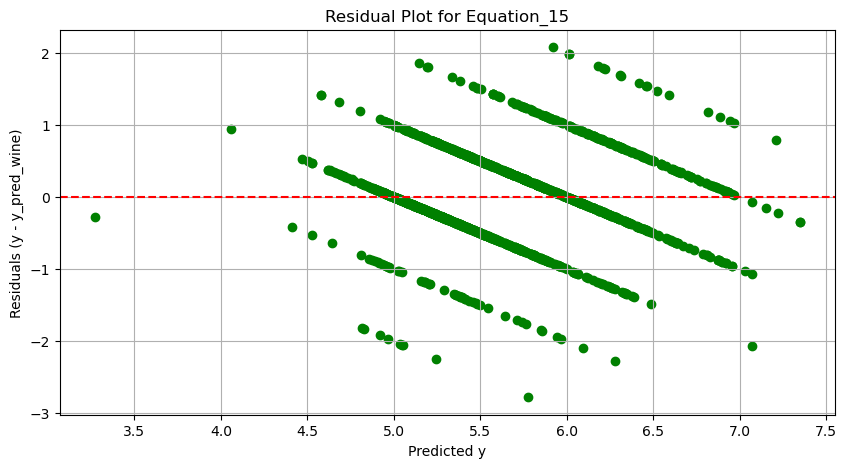


Comparison for Equation_16:
Mean Absolute Error (MAE): 0.4950467418856483
Mean Squared Error (MSE): 0.4063058934468104
Root Mean Squared Error (RMSE): 0.6374212841181336
R-squared (R²): 0.3766024964440591


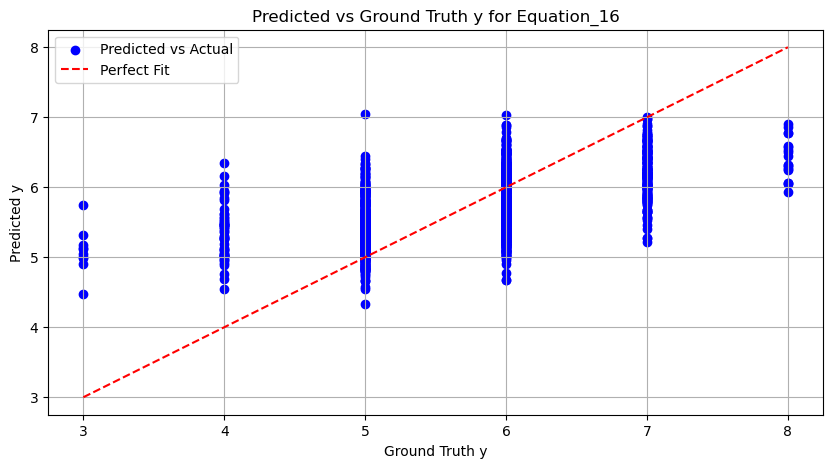

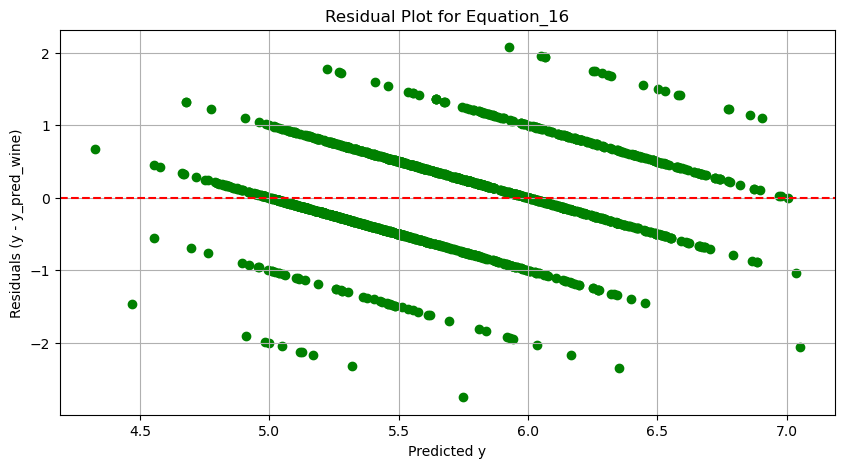

In [106]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

# Assuming y_wine is the ground truth Y values

# Loop through each column in the predictions DataFrame
for column in predictions_df.columns:
    y_pred_wine = predictions_df[column]
    
    # Calculate evaluation metrics
    mae = mean_absolute_error(y_wine, y_pred_wine)
    mse = mean_squared_error(y_wine, y_pred_wine)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_wine, y_pred_wine)
    
    # Print the comparison metrics for each equation
    print(f"\nComparison for {column}:")
    print(f'Mean Absolute Error (MAE): {mae}')
    print(f'Mean Squared Error (MSE): {mse}')
    print(f'Root Mean Squared Error (RMSE): {rmse}')
    print(f'R-squared (R²): {r2}')
    
    # 1. Scatter Plot: Ground Truth vs. Predicted
    plt.figure(figsize=(10, 5))
    plt.scatter(y_wine, y_pred_wine, color='blue', label='Predicted vs Actual')
    plt.plot([min(y_wine), max(y_wine)], [min(y_wine), max(y_wine)], color='red', linestyle='--', label='Perfect Fit')
    plt.xlabel('Ground Truth y')
    plt.ylabel('Predicted y')
    plt.title(f'Predicted vs Ground Truth y for {column}')
    plt.legend()
    plt.grid(True)
    plt.show()

    # 2. Residual Plot: Residuals (y_wine - y_pred_wine)
    residuals = y_wine - y_pred_wine

    plt.figure(figsize=(10, 5))
    plt.scatter(y_pred_wine, residuals, color='green')
    plt.axhline(0, color='red', linestyle='--')
    plt.xlabel('Predicted y')
    plt.ylabel('Residuals (y - y_pred_wine)')
    plt.title(f'Residual Plot for {column}')
    plt.grid(True)
    plt.show()


USING LINE GRAPH FOR VISUAL COMPARISON AND CALCULATION OF THE ACCURACY


Comparison for Equation_2:
Mean Absolute Error (MAE): 0.5556976972259667
Mean Squared Error (MSE): 0.5050616059774803
Root Mean Squared Error (RMSE): 0.7106768646702102
R-squared (R²): 0.22508103036036042
Accuracy: 90.14%


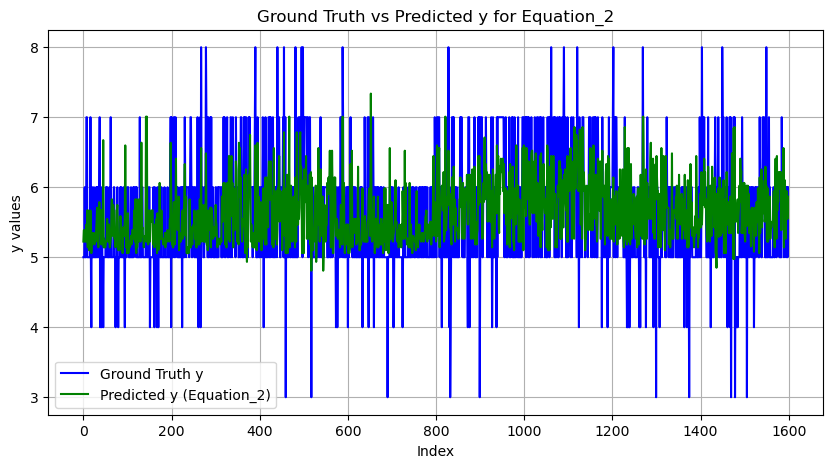

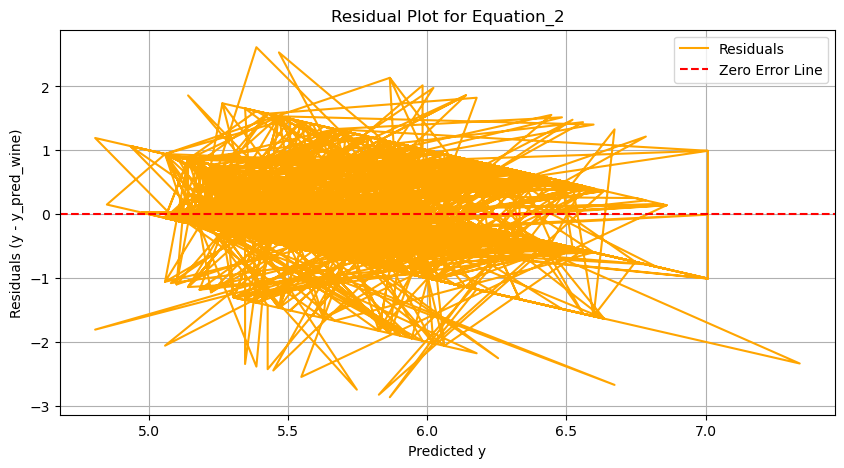


Comparison for Equation_3:
Mean Absolute Error (MAE): 0.5204481789810452
Mean Squared Error (MSE): 0.4679135091908901
Root Mean Squared Error (RMSE): 0.6840420375904467
R-squared (R²): 0.28207757205991224
Accuracy: 90.77%


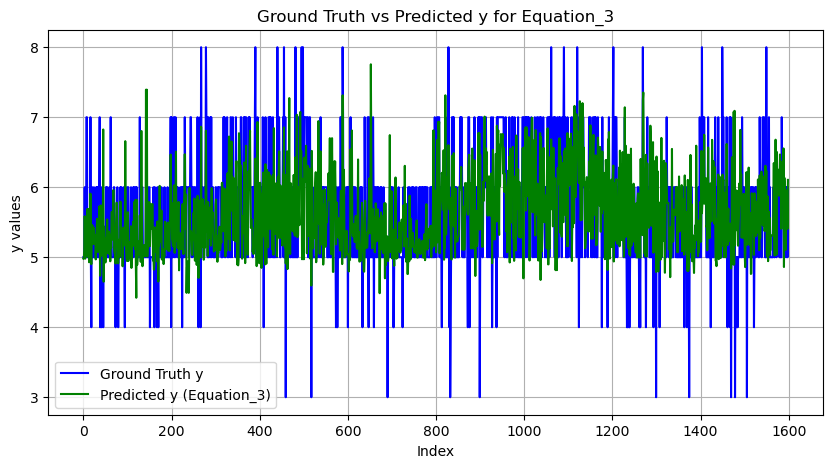

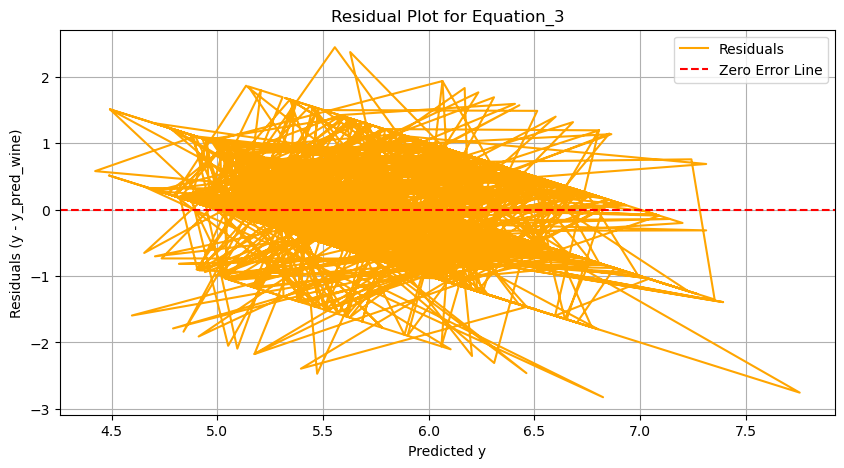


Comparison for Equation_4:
Mean Absolute Error (MAE): 0.5382411343485632
Mean Squared Error (MSE): 0.4528226432092487
Root Mean Squared Error (RMSE): 0.6729209784285587
R-squared (R²): 0.3052315758072983
Accuracy: 90.45%


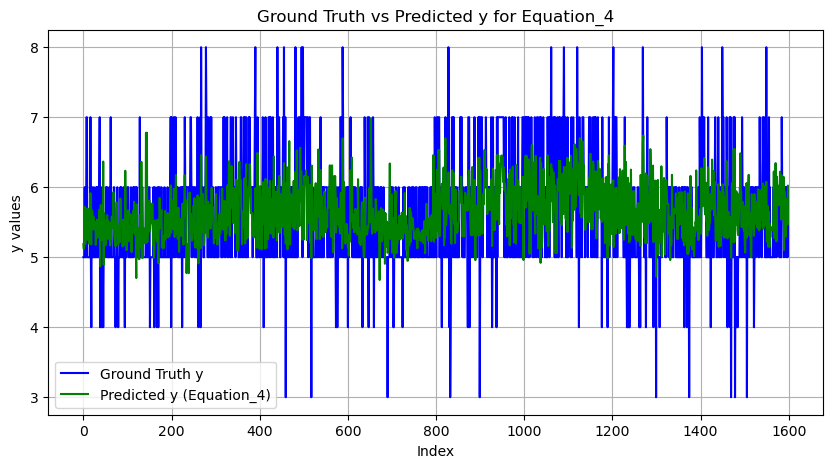

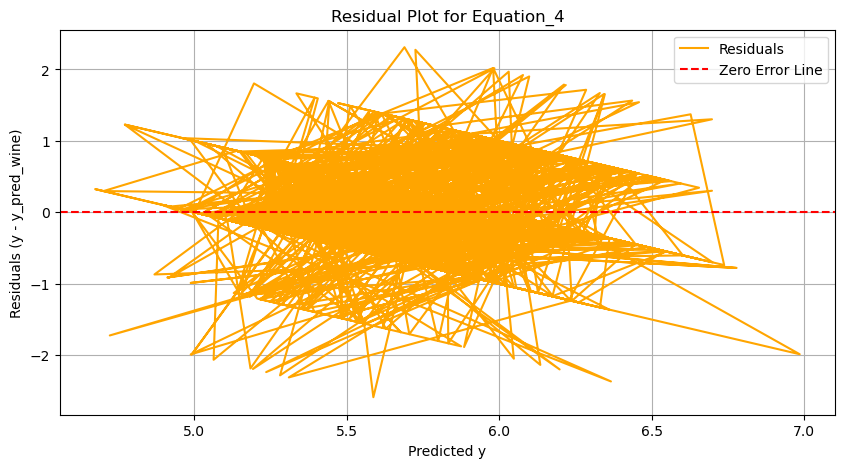


Comparison for Equation_5:
Mean Absolute Error (MAE): 0.5099851485135823
Mean Squared Error (MSE): 0.44129791791722134
Root Mean Squared Error (RMSE): 0.6643025800922508
R-squared (R²): 0.32291402908226774
Accuracy: 90.95%


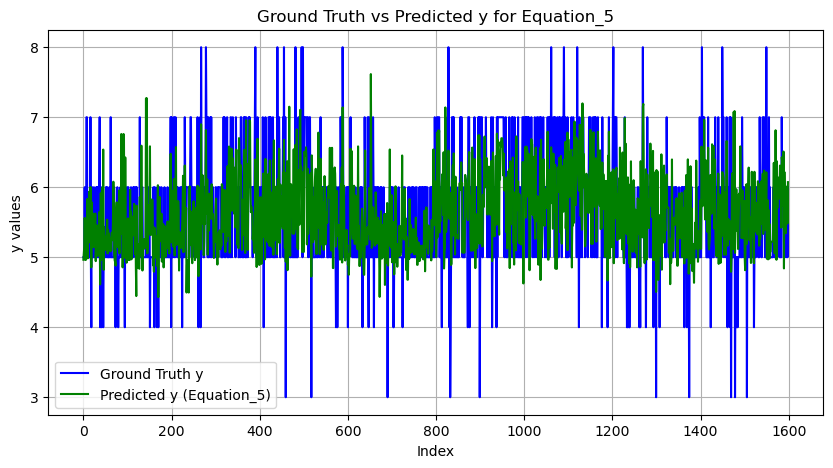

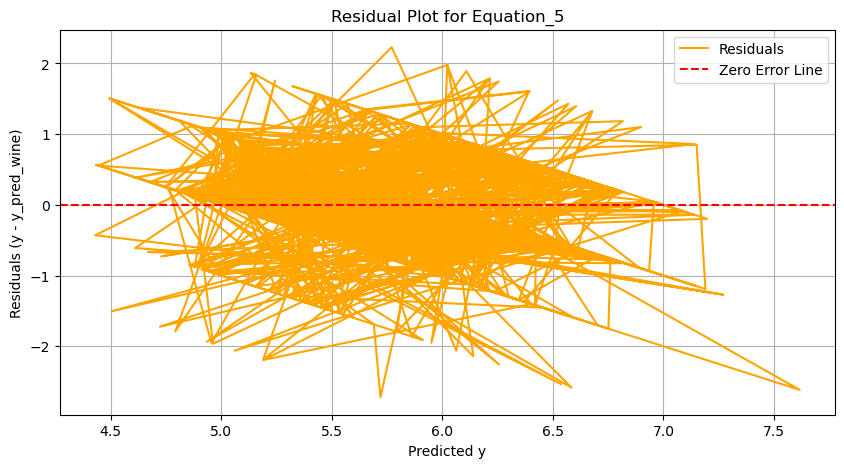


Comparison for Equation_6:
Mean Absolute Error (MAE): 0.5072705414693022
Mean Squared Error (MSE): 0.43423251905329585
Root Mean Squared Error (RMSE): 0.6589632152505145
R-squared (R²): 0.3337545117935399
Accuracy: 91.00%


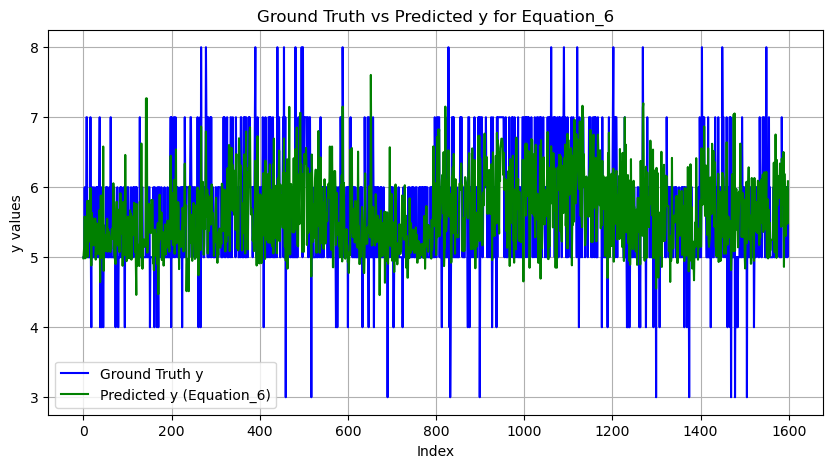

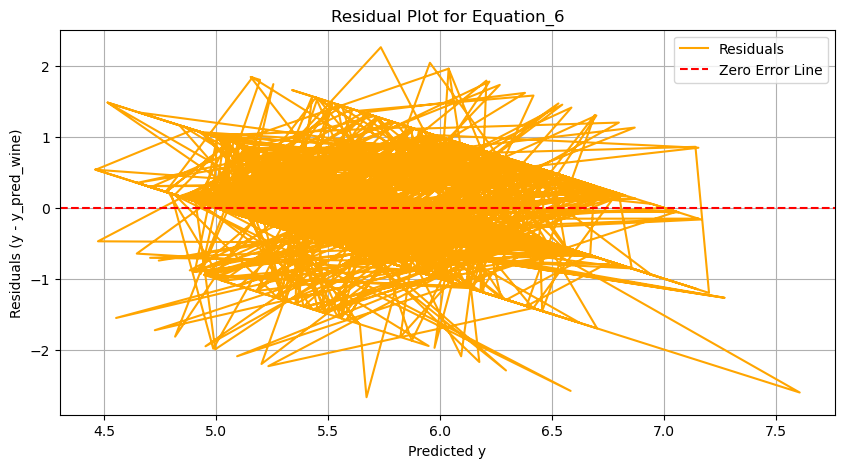


Comparison for Equation_13:
Mean Absolute Error (MAE): 0.5001455174287944
Mean Squared Error (MSE): 0.4139394779882098
Root Mean Squared Error (RMSE): 0.6433812850776822
R-squared (R²): 0.36489024313185214
Accuracy: 91.13%


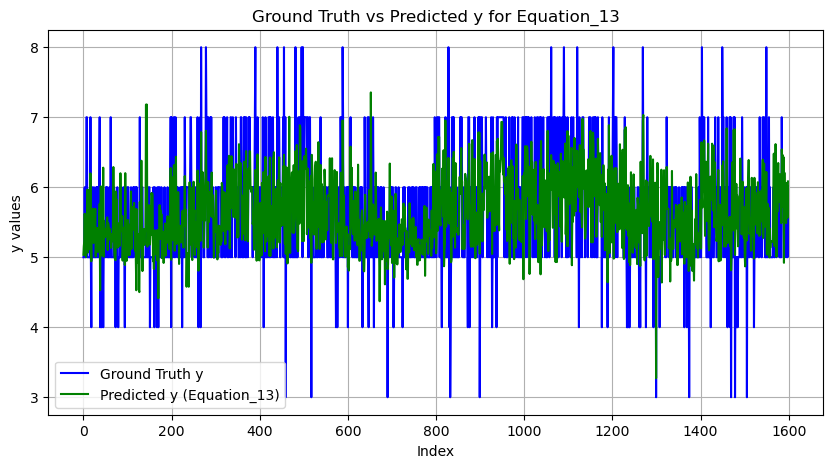

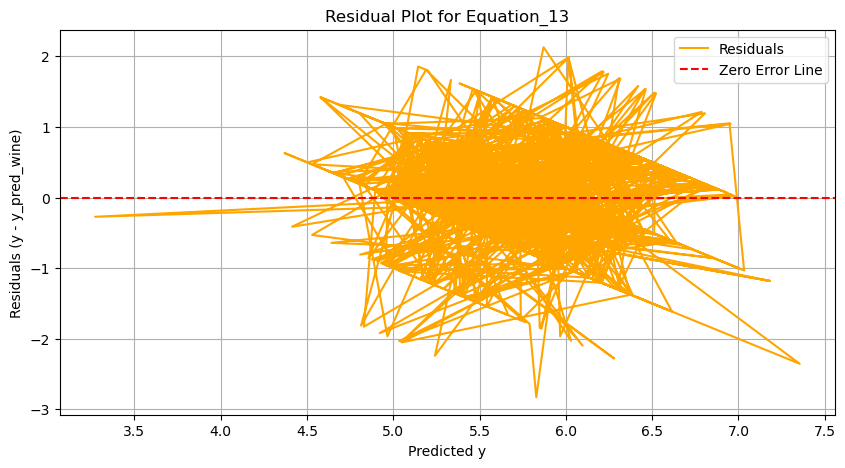


Comparison for Equation_14:
Mean Absolute Error (MAE): 0.4915815899920737
Mean Squared Error (MSE): 0.40696698284656435
Root Mean Squared Error (RMSE): 0.6379396388739019
R-squared (R²): 0.3755881831198349
Accuracy: 91.28%


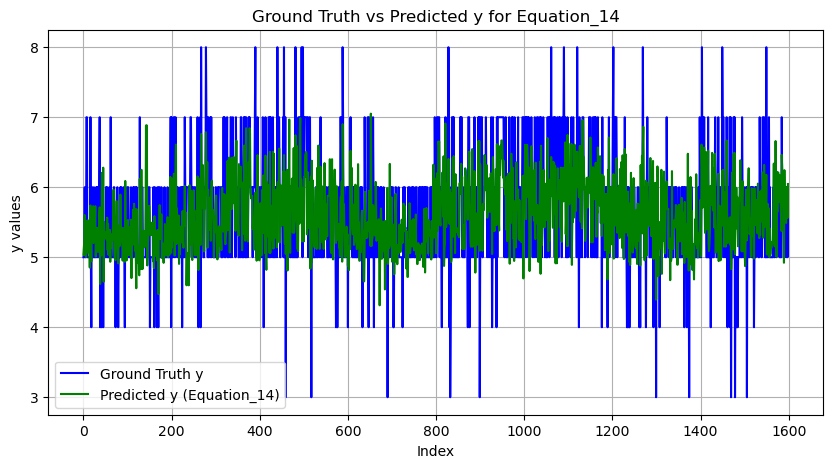

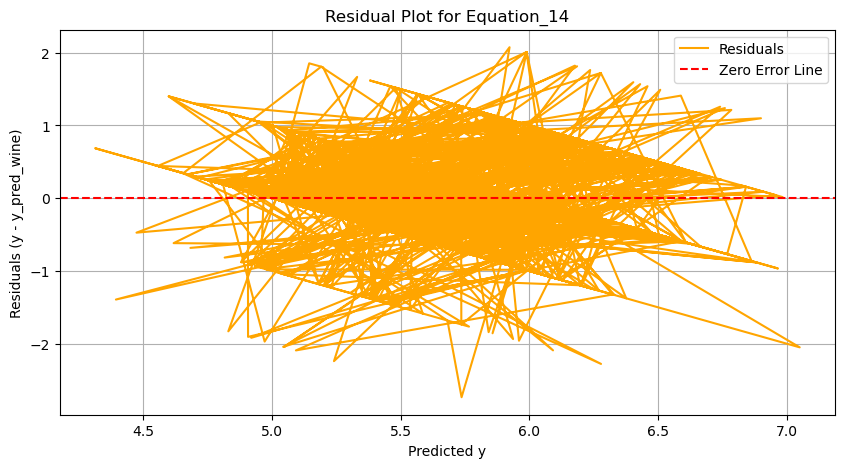


Comparison for Equation_15:
Mean Absolute Error (MAE): 0.4910715620478565
Mean Squared Error (MSE): 0.4063947669678446
Root Mean Squared Error (RMSE): 0.637490993636651
R-squared (R²): 0.3764661372820618
Accuracy: 91.29%


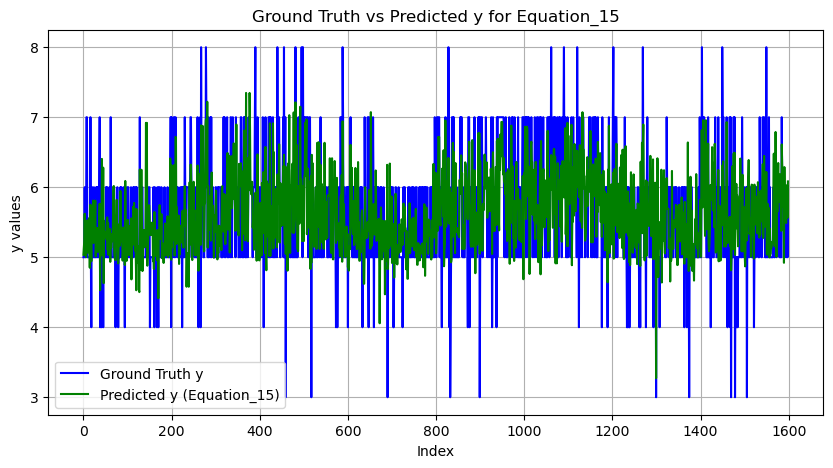

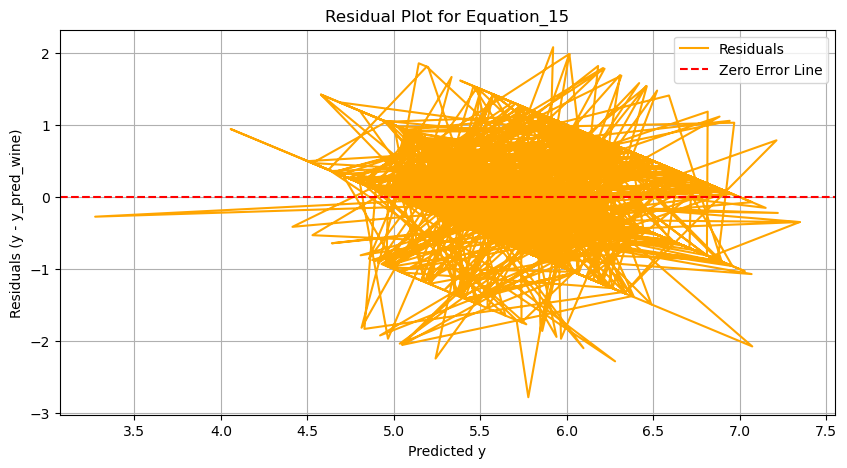


Comparison for Equation_16:
Mean Absolute Error (MAE): 0.4950467418856483
Mean Squared Error (MSE): 0.4063058934468104
Root Mean Squared Error (RMSE): 0.6374212841181336
R-squared (R²): 0.3766024964440591
Accuracy: 91.22%


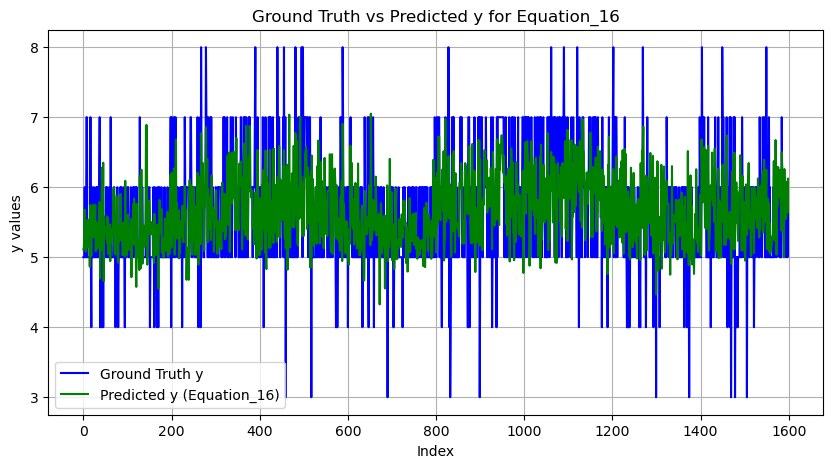

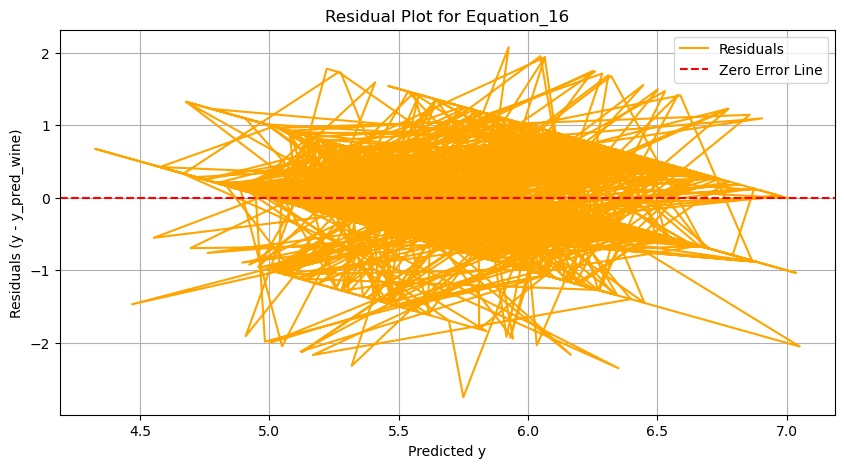

In [107]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

# Assuming y_wine is the ground truth Y values

# Loop through each column in the predictions DataFrame
for i, column in enumerate(predictions_df.columns):
    y_pred_wine = predictions_df[column]
    
    # Calculate evaluation metrics
    mae = mean_absolute_error(y_wine, y_pred_wine)
    mse = mean_squared_error(y_wine, y_pred_wine)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_wine, y_pred_wine)
    
    # Calculate accuracy as (1 - MAE / mean of actual values) * 100
    accuracy = (1 - mae / np.mean(y_wine)) * 100
    
    # Print the comparison metrics for each equation
    print(f"\nComparison for {column}:")
    print(f'Mean Absolute Error (MAE): {mae}')
    print(f'Mean Squared Error (MSE): {mse}')
    print(f'Root Mean Squared Error (RMSE): {rmse}')
    print(f'R-squared (R²): {r2}')
    print(f'Accuracy: {accuracy:.2f}%')
    
    # 1. Line Plot: Ground Truth vs. Predicted
    plt.figure(figsize=(10, 5))
    plt.plot(y_wine, label='Ground Truth y', color='blue')
    plt.plot(y_pred_wine, label=f'Predicted y ({column})', color='green')
    plt.xlabel('Index')
    plt.ylabel('y values')
    plt.title(f'Ground Truth vs Predicted y for {column}')
    plt.legend()
    plt.grid(True)
    plt.show()

    # 2. Residual Plot: Residuals (y_wine - y_pred_wine)
    residuals = y_wine - y_pred_wine

    plt.figure(figsize=(10, 5))
    plt.plot(y_pred_wine, residuals, label='Residuals', color='orange')
    plt.axhline(0, color='red', linestyle='--', label='Zero Error Line')
    plt.xlabel('Predicted y')
    plt.ylabel('Residuals (y - y_pred_wine)')
    plt.title(f'Residual Plot for {column}')
    plt.legend()
    plt.grid(True)
    plt.show()


So far the equations are finding difficult to predict higher and low measures of the target variable, lets check the remaining equations first then investigate why it is so

In [102]:
equations

complexity      loss     score  \
0            1  0.651760  0.000000   
1            3  0.505061  0.127498   
2            5  0.467913  0.038198   
3            6  0.452823  0.032783   
4            7  0.441298  0.025781   
5            8  0.434232  0.016140   
6            9  0.429257  0.011525   
7           10  0.426336  0.006826   
8           11  0.422476  0.009095   
9           12  0.418143  0.010310   
10          13  0.414542  0.008649   
11          14  0.414541  0.000004   
12          15  0.413939  0.001452   
13          16  0.406967  0.016987   
14          17  0.406395  0.001407   
15          18  0.406306  0.000219   
16          20  0.403236  0.003792   

                                             equation  \
0                                            5.635949   
1                                     x10 ^ 0.7377849   
2                              (x10 ^ 0.7751038) - x1   
3                          exp(x10 ^ 0.25550094) - x1   
4                       (x10 ^ 0.7274747) - (x1 - x9)   
5                  (x10 ^ 0.7317668) - (x1 - sin(x9))   
6     (x10 ^ 0.72884554) - (x1 - min(x9, 0.83156425))   
7   (x10 ^ 0.72884554) - tan(x1 - min(x9, 0.831564...   
8   ((1.9572898 + x10) ^ 0.6794542) - (x1 - min(0....   
9   ((1.9515293 + x10) ^ 0.67123234) - (x1 - tan(m...   
10  ((1.9667075 + x10) ^ 0.67123234) - tan(x1 - ta...   
11  ((cube(1.2557999) + x10) ^ 0.67123234) - tan(x...   
12  ((1.9515293 + x10) ^ 0.67123234) - tan(x1 - ta...   
13  ((1.9515293 + x10) ^ 0.67123234) - (x1 - tan(m...   
14  ((1.9515293 + x10) ^ 0.67123234) - tan(x1 - ta...   
15  ((1.9515293 + (x10 - -0.25893846)) ^ 0.6712323...   
16  ((1.9515293 + x10) ^ 0.67123234) - tan(x1 - mi...   

                                         sympy_format  \
0                                    5.63594900000000   
1                                      x10**0.7377849   
2                                -x1 + x10**0.7751038   
3                          -x1 + exp(x10**0.25550094)   
4                          x10**0.7274747 - (x1 - x9)   
5                     x10**0.7317668 - (x1 - sin(x9))   
6   x10**0.72884554 - (x1 - Piecewise((x9, x9 < 0....   
7   x10**0.72884554 - tan(x1 - Piecewise((x9, x9 <...   
8   -(x1 - Piecewise((0.83156425, x9 > 0.83156425)...   
9   -(x1 - tan(Piecewise((x9, x9 < 0.7565608), (0....   
10  (x10 + 1.9667075)**0.67123234 - tan(x1 - tan(P...   
11  (x10 + 1.98043837200195)**0.67123234 - tan(x1 ...   
12  (x10 + 1.9515293)**0.67123234 - tan(x1 - tan(P...   
13  -(x1 - tan(Piecewise((x9, x9 < (0.74943185**0....   
14  (x10 + 1.9515293)**0.67123234 - tan(x1 - tan(P...   
15  -(x1 - tan(Piecewise((x9, x9 < (0.74943185**0....   
16  (x10 + 1.9515293)**0.67123234 - tan(x1 - Piece...   

                                        lambda_format  
0                   PySRFunction(X=>5.63594900000000)  
1                     PySRFunction(X=>x10**0.7377849)  
2               PySRFunction(X=>-x1 + x10**0.7751038)  
3         PySRFunction(X=>-x1 + exp(x10**0.25550094))  
4         PySRFunction(X=>x10**0.7274747 - (x1 - x9))  
5    PySRFunction(X=>x10**0.7317668 - (x1 - sin(x9)))  
6   PySRFunction(X=>x10**0.72884554 - (x1 - Piecew...  
7   PySRFunction(X=>x10**0.72884554 - tan(x1 - Pie...  
8   PySRFunction(X=>-(x1 - Piecewise((0.83156425, ...  
9   PySRFunction(X=>-(x1 - tan(Piecewise((x9, x9 <...  
10  PySRFunction(X=>(x10 + 1.9667075)**0.67123234 ...  
11  PySRFunction(X=>(x10 + 1.98043837200195)**0.67...  
12  PySRFunction(X=>(x10 + 1.9515293)**0.67123234 ...  
13  PySRFunction(X=>-(x1 - tan(Piecewise((x9, x9 <...  
14  PySRFunction(X=>(x10 + 1.9515293)**0.67123234 ...  
15  PySRFunction(X=>-(x1 - tan(Piecewise((x9, x9 <...  
16  PySRFunction(X=>(x10 + 1.9515293)**0.67123234 ...

In [108]:
list_equation = list(equations["equation"])

list_equation

['5.635949',
 'x10 ^ 0.7377849',
 '(x10 ^ 0.7751038) - x1',
 'exp(x10 ^ 0.25550094) - x1',
 '(x10 ^ 0.7274747) - (x1 - x9)',
 '(x10 ^ 0.7317668) - (x1 - sin(x9))',
 '(x10 ^ 0.72884554) - (x1 - min(x9, 0.83156425))',
 '(x10 ^ 0.72884554) - tan(x1 - min(x9, 0.83156425))',
 '((1.9572898 + x10) ^ 0.6794542) - (x1 - min(0.83156425, x9))',
 '((1.9515293 + x10) ^ 0.67123234) - (x1 - tan(min(x9, 0.7565608)))',
 '((1.9667075 + x10) ^ 0.67123234) - tan(x1 - tan(min(x9, 0.748993)))',
 '((cube(1.2557999) + x10) ^ 0.67123234) - tan(x1 - tan(min(x9, 0.748993)))',
 '((1.9515293 + x10) ^ 0.67123234) - tan(x1 - tan(min(x9, 0.7317668 ^ x9)))',
 '((1.9515293 + x10) ^ 0.67123234) - (x1 - tan(min(x9, (0.74943185 ^ 0.021390188) ^ x6)))',
 '((1.9515293 + x10) ^ 0.67123234) - tan(x1 - tan(min(x9, (0.74943185 ^ 0.021390188) ^ x6)))',
 '((1.9515293 + (x10 - -0.25893846)) ^ 0.67123234) - (x1 - tan(min(x9, (0.74943185 ^ 0.02495391) ^ x6)))',
 '((1.9515293 + x10) ^ 0.67123234) - tan(x1 - min(tan(min(x9, (0.7494318

Equations 7 to 13 had issues in the iteration code, so we will just generate the y_pred series of those equations individually


In [112]:
# Equation 7

# (x10 ^ 0.72884554) - tan(x1 - min(x9, 0.83156425))

# Extract relevant columns from X_wine
x1 = X_wine[:, 1]
x9 = X_wine[:, 9]
x10 = X_wine[:, 10]

# Construct y_pred_wine_7 using the given equation
y_pred_wine_7 = np.power(x10, 0.72884554) - np.tan(x1 - np.minimum(x9, 0.83156425))

# Print or store the predictions
print(f'Predicted y values (y_pred_wine_7): {y_pred_wine_7}')

Predicted y values (y_pred_wine_7): [4.97895945 5.07506293 5.16732714 ... 5.98607187 5.49901791 6.10638367]



Comparison for Equation_16:
Mean Absolute Error (MAE): 0.5027811525644922
Mean Squared Error (MSE): 0.4263363439325507
Root Mean Squared Error (RMSE): 0.6529443651127949
R-squared (R²): 0.34586965936414094
Accuracy: 91.08%


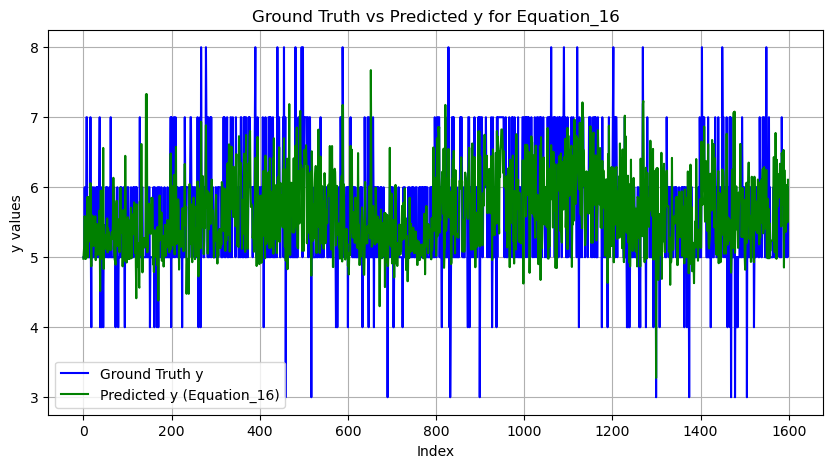

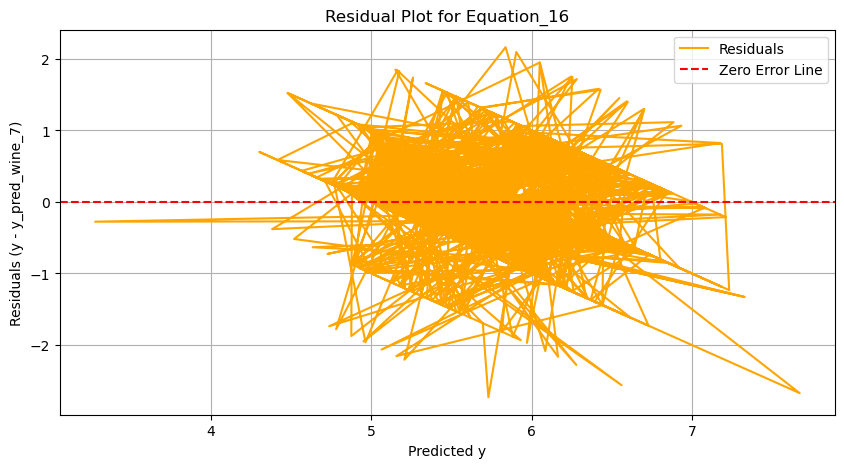

In [113]:
# Calculate evaluation metrics
mae = mean_absolute_error(y_wine, y_pred_wine_7)
mse = mean_squared_error(y_wine, y_pred_wine_7)
rmse = np.sqrt(mse)
r2 = r2_score(y_wine, y_pred_wine_7)
    
# Calculate accuracy as (1 - MAE / mean of actual values) * 100
accuracy = (1 - mae / np.mean(y_wine)) * 100
    
# Print the comparison metrics for each equation
print(f"\nComparison for {column}:")
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R-squared (R²): {r2}')
print(f'Accuracy: {accuracy:.2f}%')
    
# 1. Line Plot: Ground Truth vs. Predicted
plt.figure(figsize=(10, 5))
plt.plot(y_wine, label='Ground Truth y', color='blue')
plt.plot(y_pred_wine_7, label=f'Predicted y ({column})', color='green')
plt.xlabel('Index')
plt.ylabel('y values')
plt.title(f'Ground Truth vs Predicted y for {column}')
plt.legend()
plt.grid(True)
plt.show()

# 2. Residual Plot: Residuals (y_wine - y_pred_wine_7)
residuals = y_wine - y_pred_wine_7

plt.figure(figsize=(10, 5))
plt.plot(y_pred_wine_7, residuals, label='Residuals', color='orange')
plt.axhline(0, color='red', linestyle='--', label='Zero Error Line')
plt.xlabel('Predicted y')
plt.ylabel('Residuals (y - y_pred_wine_7)')
plt.title(f'Residual Plot for {column}')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# Equation 8


# Extract relevant columns from X_wine
x1 = X_wine[:, 1]
x9 = X_wine[:, 9]
x10 = X_wine[:, 10]

# Construct y_pred_wine_8 using the given equation
y_pred_wine_8 = np.power(x10, 0.72884554) - np.tan(x1 - np.minimum(x9, 0.83156425))

# Print or store the predictions
print(f'Predicted y values (y_pred_wine_8): {y_pred_wine_8}')

Noticed that so much operators could introduce a lot of confusion in the Equation discovery process using Symbolic regression and i suspect that could be the reason the equations were finding difficult to predict pass the mid range of the target variable
this is the reason i removed the min, max and modulo operators as well as the sign and absolute value operator since these operators have the capacity of limiting the attributive or mediating effects of most data point to the mean of their varibles.

Also there could be a problem of noise introduced by many features in the X matrix, so running a feature selection using RFECV before trying the equation discovery is another advanced method to try next

Another thing to try; since the target variable have a countable unique label (3, 4, 5, 6, 7, 8), we can treat them as categories and try to predict them in bins



MODIFYING THE SYMBOLIC REGRESSION TREE

REMOVAL OF SOME OPERATORS TO INVESTIGATE THE LIMITATIONS WITHE THE PREVIOUSLY DISCOVERED EQUATIONS

In [14]:
from pysr import PySRRegressor

# Initialize the PySRRegressor with all available operators

# Generate variable names from x0 to x10
variable_names = [f'x{i}' for i in range(11)]

model = PySRRegressor(
    niterations=1000,  # Number of iterations (adjust as necessary)
    
    # List of binary operators (two inputs)
    binary_operators=[
        "+",    # Addition
        "-",    # Subtraction
        "*",    # Multiplication
        "/",    # Division
        "^",    # Power (alternative to **)
        "%",    # Modulo (remainder after division)
        
    ],
    
    # List of unary operators (one input)
    unary_operators=[
        "sin",      # Sine function
        "cos",      # Cosine function
        "tan",      # Tangent function
        "exp",      # Exponential function (e^x)
        "log",      # Natural logarithm (ln(x))
        
        "sqrt",     # Square root
        
        "inv",      # Inverse (1/x)
        "square",   # Square of the value (x**2)
        "cube",     # Cube of the value (x**3)
    ],
    
    # Define any custom operators (optional)
    extra_sympy_mappings={"inv": lambda x: 1/x},  # Example of a custom operator
    variable_names=variable_names  # Provide variable names
)

# Fit the model with your dataset
model.fit(X_wine, y_wine)

# View the best equations discovered
equations = model.equations_
print("Discovered Equations:")
print(equations)



c:\Users\chidi\anaconda3\envs\boot_DA\lib\site-packages\pysr\sr.py:922: FutureWarning: `variable_names` is a data-dependent parameter and should be passed when fit is called. Ignoring parameter; please pass `variable_names` during the call to fit instead.
  warnings.warn(
c:\Users\chidi\anaconda3\envs\boot_DA\lib\site-packages\pysr\sr.py:2582: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(
c:\Users\chidi\anaconda3\envs\boot_DA\lib\site-packages\pysr\sr.py:2059: UserWarning: Note: you are running with 10 features or more. Genetic algorithms like used in PySR scale poorly with large numbers of features. You should run PySR for more `niterations` to ensure it can find the correct variables, and consider using a larger `maxsize`.
  warnings.warn(
c:\Users\chidi\anaconda3\envs\boot_DA\lib\site-packages\pysr\sr.py:73: UserWarning: You are using the `^` operator, but have not set up `constraints` for it. This may lead to over

Compiling Julia backend...


[ Info: Started!



Expressions evaluated per second: 6.660e+04
Head worker occupation: 13.6%
Progress: 135 / 15000 total iterations (0.900%)
Hall of Fame:
---------------------------------------------------------------------------------------------------
Complexity  Loss       Score     Equation
1           2.940e+01  1.594e+01  y = x₂
2           6.518e-01  3.809e+00  y = sqrt(31.764)
3           5.663e-01  1.406e-01  y = 0.5235 * x₁₀
4           5.139e-01  9.706e-02  y = sqrt(x₁₀ / 0.32677)
6           5.091e-01  4.689e-03  y = sqrt(x₁₀ / 0.27119) + -0.56454
7           5.028e-01  1.239e-02  y = sqrt((x₁₀ + x₂) / square(-0.5774))
8           4.997e-01  6.252e-03  y = sqrt((x₁₀ / 0.33799) - (-1.0766 / x₁))
9           4.899e-01  1.976e-02  y = sqrt(inv(x₁) + (x₁₀ / tan(square(-0.5774))))
10          4.883e-01  3.299e-03  y = sqrt(((x₁₀ / 0.33799) + -0.73691) - (-1.0766 / x₁))
11          4.771e-01  2.320e-02  y = (sqrt(x₁₀ + exp(2.1626)) + x₉) - sin(log(x₁))
16          4.769e-01  1.038e-04  y = x₉ + (

In [ ]:
import numpy as np
import sympy as sp
import pandas as pd

# Define cube function
def cube(x):
    return np.power(x, 3)

# Dictionary to store predictions for each equation
predictions_dict_2 = {}

# Iterate through discovered equations and make predictions
for i, row in model.equations_.iterrows():
    # Get the equation as a SymPy object
    sympy_eq = row['equation']
    
    # Convert SymPy equation to a string
    sympy_eq_str = str(sympy_eq)
    
    # Replace all instances of ^ with ** (for exponentiation)
    sympy_eq_str_fixed = sympy_eq_str.replace('^', '**')
    
    # Replace amin with np.min to ensure correct operation
    sympy_eq_str_fixed = sympy_eq_str_fixed.replace('amin', 'np.min')
    
    # Convert the string back to a SymPy expression
    sympy_eq_fixed = sp.sympify(sympy_eq_str_fixed)
    
    # Convert it into a Python function using sympy.lambdify
    func = sp.lambdify(variable_names, sympy_eq_fixed, modules=[{"cube": cube}, "numpy"])
    
    # Make predictions using the discovered equation
    try:
        y_pred_wine = func(*X_wine.T)  # Transpose X so that it fits the function input
        
        # Create a name for the series based on the equation number
        equation_name = f"Equation_{i+1}"
        
        # Store the predictions in the dictionary as a pandas Series
        predictions_dict_2[equation_name] = pd.Series(y_pred_wine, name=equation_name)
        
        # Print the equation and its predictions
        print(f"Equation {i+1}: {sympy_eq_fixed}")
        print(f"Predicted Y values: {y_pred_wine}\n")
    
    except Exception as e:
        print(f"Error in Equation {i+1}: {str(e)}")

# Create a DataFrame from the dictionary of predictions
predictions_df = pd.DataFrame(predictions_dict_2)

# Display the resulting DataFrame
print(predictions_df.head())


TRYING THE *SPARSE IDENTIFICATION OF NON8LINEAR DYNAMICS* METHOD

In [33]:
pip install pysindy


   ---------------------------------------- 0.0/121.0 kB ? eta -:--:--
   ---------------------------------------- 121.0/121.0 kB 2.4 MB/s eta 0:00:00
   ---------------------------------------- 0.0/8.4 MB ? eta -:--:--
   - -------------------------------------- 0.2/8.4 MB 4.8 MB/s eta 0:00:02
   -- ------------------------------------- 0.5/8.4 MB 5.2 MB/s eta 0:00:02
   --- ------------------------------------ 0.7/8.4 MB 5.2 MB/s eta 0:00:02
   ---- ----------------------------------- 1.0/8.4 MB 5.2 MB/s eta 0:00:02
   ---- ----------------------------------- 1.0/8.4 MB 5.5 MB/s eta 0:00:02
   ----- ---------------------------------- 1.1/8.4 MB 4.5 MB/s eta 0:00:02
   ------- -------------------------------- 1.6/8.4 MB 4.7 MB/s eta 0:00:02
   -------- ------------------------------- 1.9/8.4 MB 4.9 MB/s eta 0:00:02
   ---------- ----------------------------- 2.2/8.4 MB 5.2 MB/s eta 0:00:02
   ------------ --------------------------- 2.6/8.4 MB 5.5 MB/s eta 0:00:02
   -------------- --